In [1]:
import pandas as pd, os

In [2]:
%matplotlib notebook
import seaborn as sns, matplotlib.pyplot as plt, numpy as np
sns.set_style('darkgrid')

In [297]:
# for saving figures
import datetime
today = datetime.date.today().isoformat()
basepath = '../../graphics/codedtruth'

In [4]:
base = '../../data/codedtruth'
os.listdir(base)

['.DS_Store',
 'paper_metadata.csv',
 'papertags_how_withwhom_final.csv',
 'papertags_what_final.csv',
 'truth_metadata.csv',
 'truth_overflow.csv',
 'truth_ratings.csv',
 'v_11_coded_final.csv',
 'v_16_coded_final.csv',
 'v_19_coded_final.csv',
 'v_6_coded_final.csv',
 'v_8345etseq_final.csv',
 'v_8780etseq_final.csv']

In [5]:
dfdict = {x[:-4]:pd.read_csv(f'{base}/{x}') for x in os.listdir(base) 
          if x.endswith('.csv') and 'coded' not in x}

In [6]:
dfdict.keys()

dict_keys(['paper_metadata', 'papertags_how_withwhom_final', 'papertags_what_final', 'truth_metadata', 'truth_overflow', 'truth_ratings', 'v_8345etseq_final', 'v_8780etseq_final'])

In [87]:
def save_plot(filename):
    plt.savefig(f'{basepath}/{today}_{filename}.pdf')

## Section 3.1 - Sample

In [187]:
def count_sample(df, var):
    return df[['lfdn', var]].groupby(var).count()

def plot_sample(df, var, varname):
    count_sample(df, var).sort_index(ascending=False).plot.barh(color='k', alpha=0.7, figsize=(10,6), legend=[])
    plt.xlabel('Number of Respondents')
    plt.ylabel(varname)
    plt.tight_layout()

In [140]:
dfdict['truth_metadata'].head(1)

lfdn  lfdn_original                     v_5         v_6 v_11       v_118  \
0     0            106  Other (please specify)  Researcher    4  not quoted   

        v_119   v_120       v_121 v_12         v_14  \
0  not quoted  quoted  not quoted  Yes  Small (1-4)   

                                                v_15         v_16        v_19  \
0  Hybrid / mix of embedded systems and informati...  NotAnswered  Automotive   

   v_124 v_5_6_integrated                                 v_15_16_integrated  \
0  Italy       Researcher  Hybrid / mix of embedded systems and informati...   

   v_11_coded  v_19_coded  
0         4.0  Automotive

In [142]:
count_sample(dfdict['truth_metadata'],'v_124')

lfdn
v_124                              
-- Please make a Selection --     1
Australia                         2
Austria                           1
Belarus                           1
Belgium                           1
Brazil                           10
Canada                            8
Chile                             2
China                            10
Denmark                           2
Ecuador                           1
France                            3
Germany                          39
Greece                            2
India                             4
Italy                             3
Japan                             1
Kuwait                            1
Luxembourg                        1
Malaysia                          1
Mexico                            1
Netherlands                       4
New Zealand                       1
Norway                            2
Portugal                          2
Romania                           1
South Africa                      2
Spain                             8
Sweden                            9
Switzerland                       9
United Kingdom                    6
United States                    14
Uruguay                           1

<IPython.core.display.Javascript object>


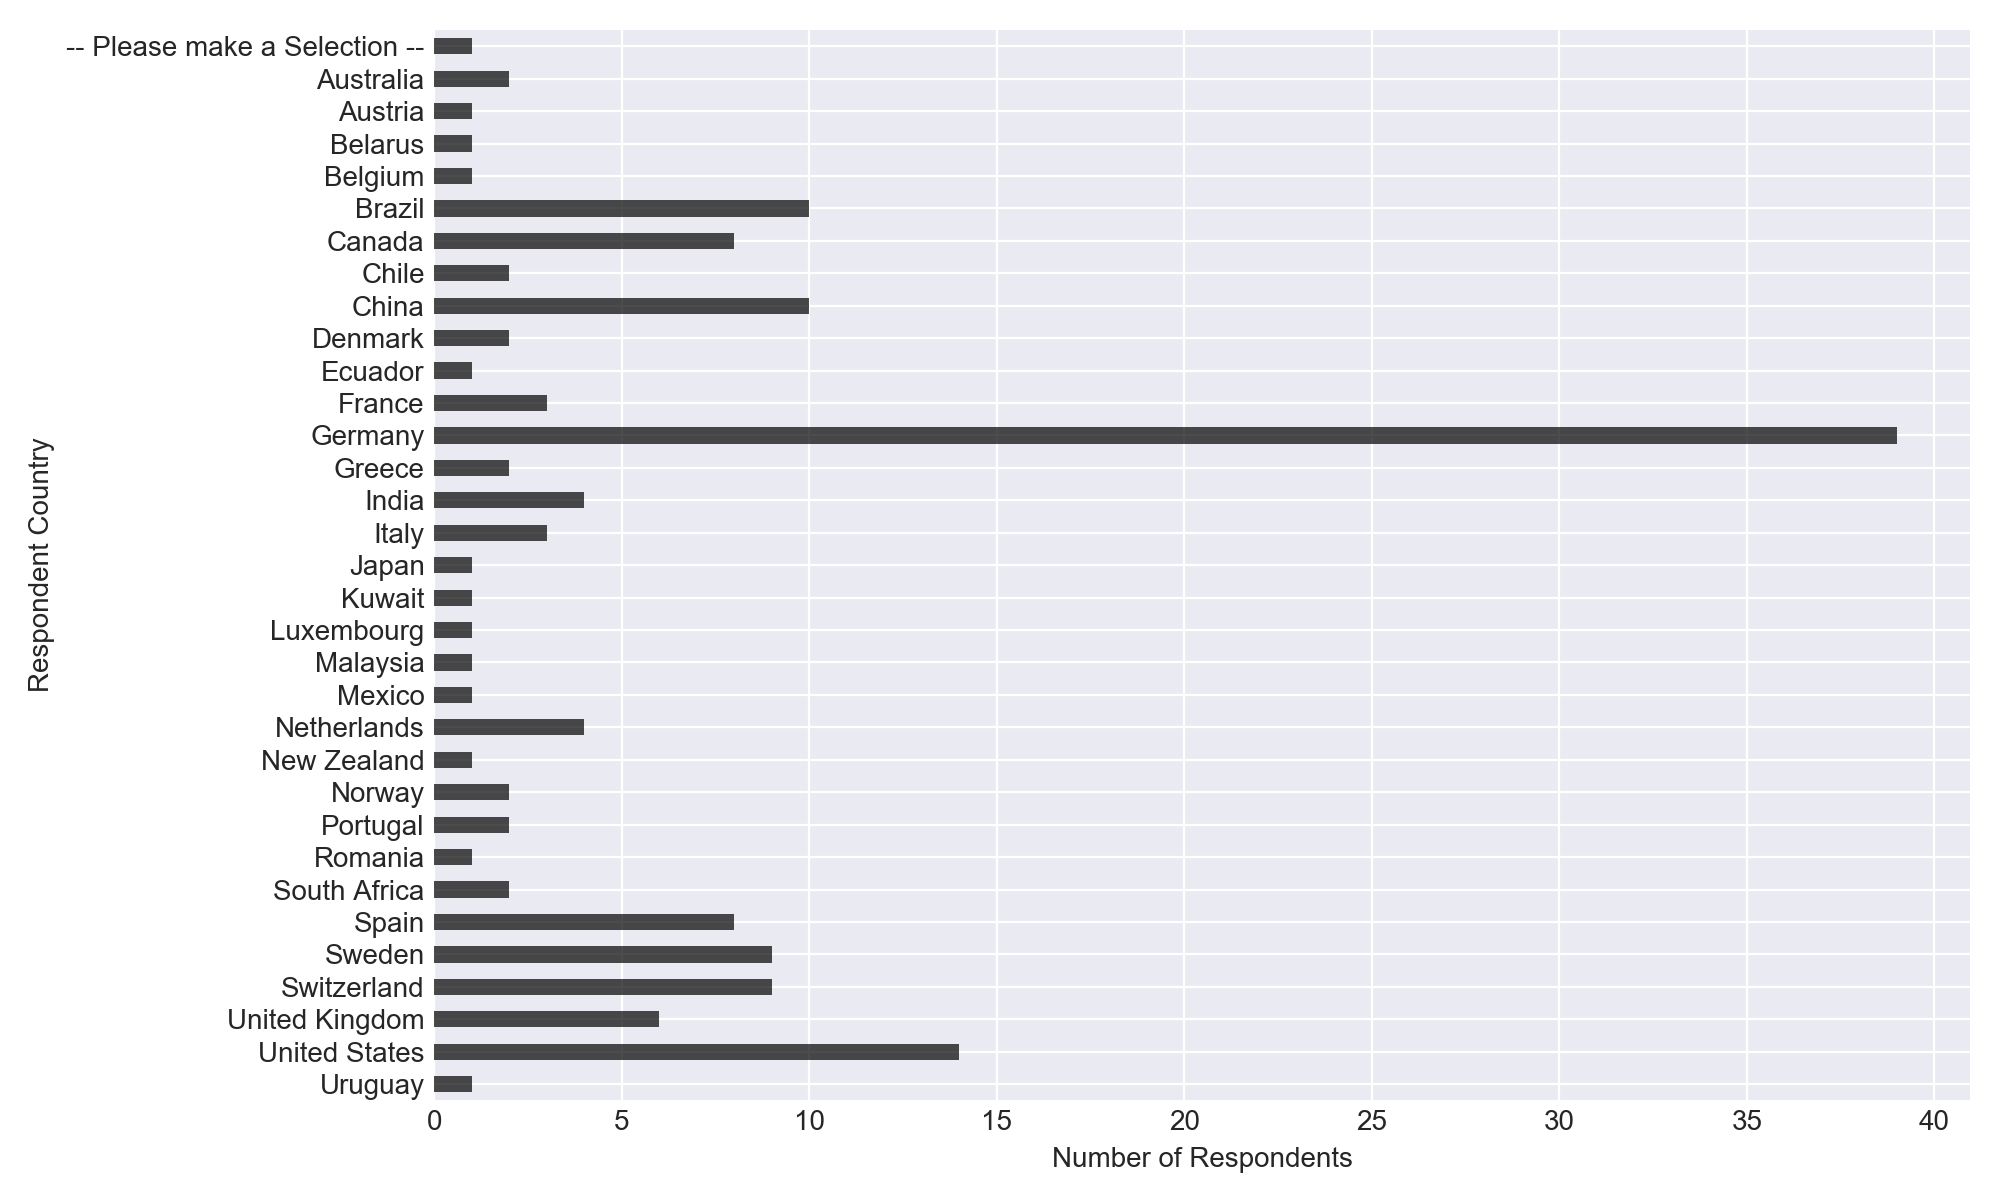

In [188]:
plot_sample(dfdict['truth_metadata'],'v_124', 'Respondent Country')
#save_plot('respondents_per_country_absolute')

In [181]:
sizes = ['Small (1-4)', 'Medium (5-10)', 'Larger (10-49)', 'Very large (50+)']
count_sample(dfdict['truth_metadata'],'v_14').loc[sizes]

lfdn
v_14                  
Small (1-4)         27
Medium (5-10)       68
Larger (10-49)      44
Very large (50+)    15

<IPython.core.display.Javascript object>


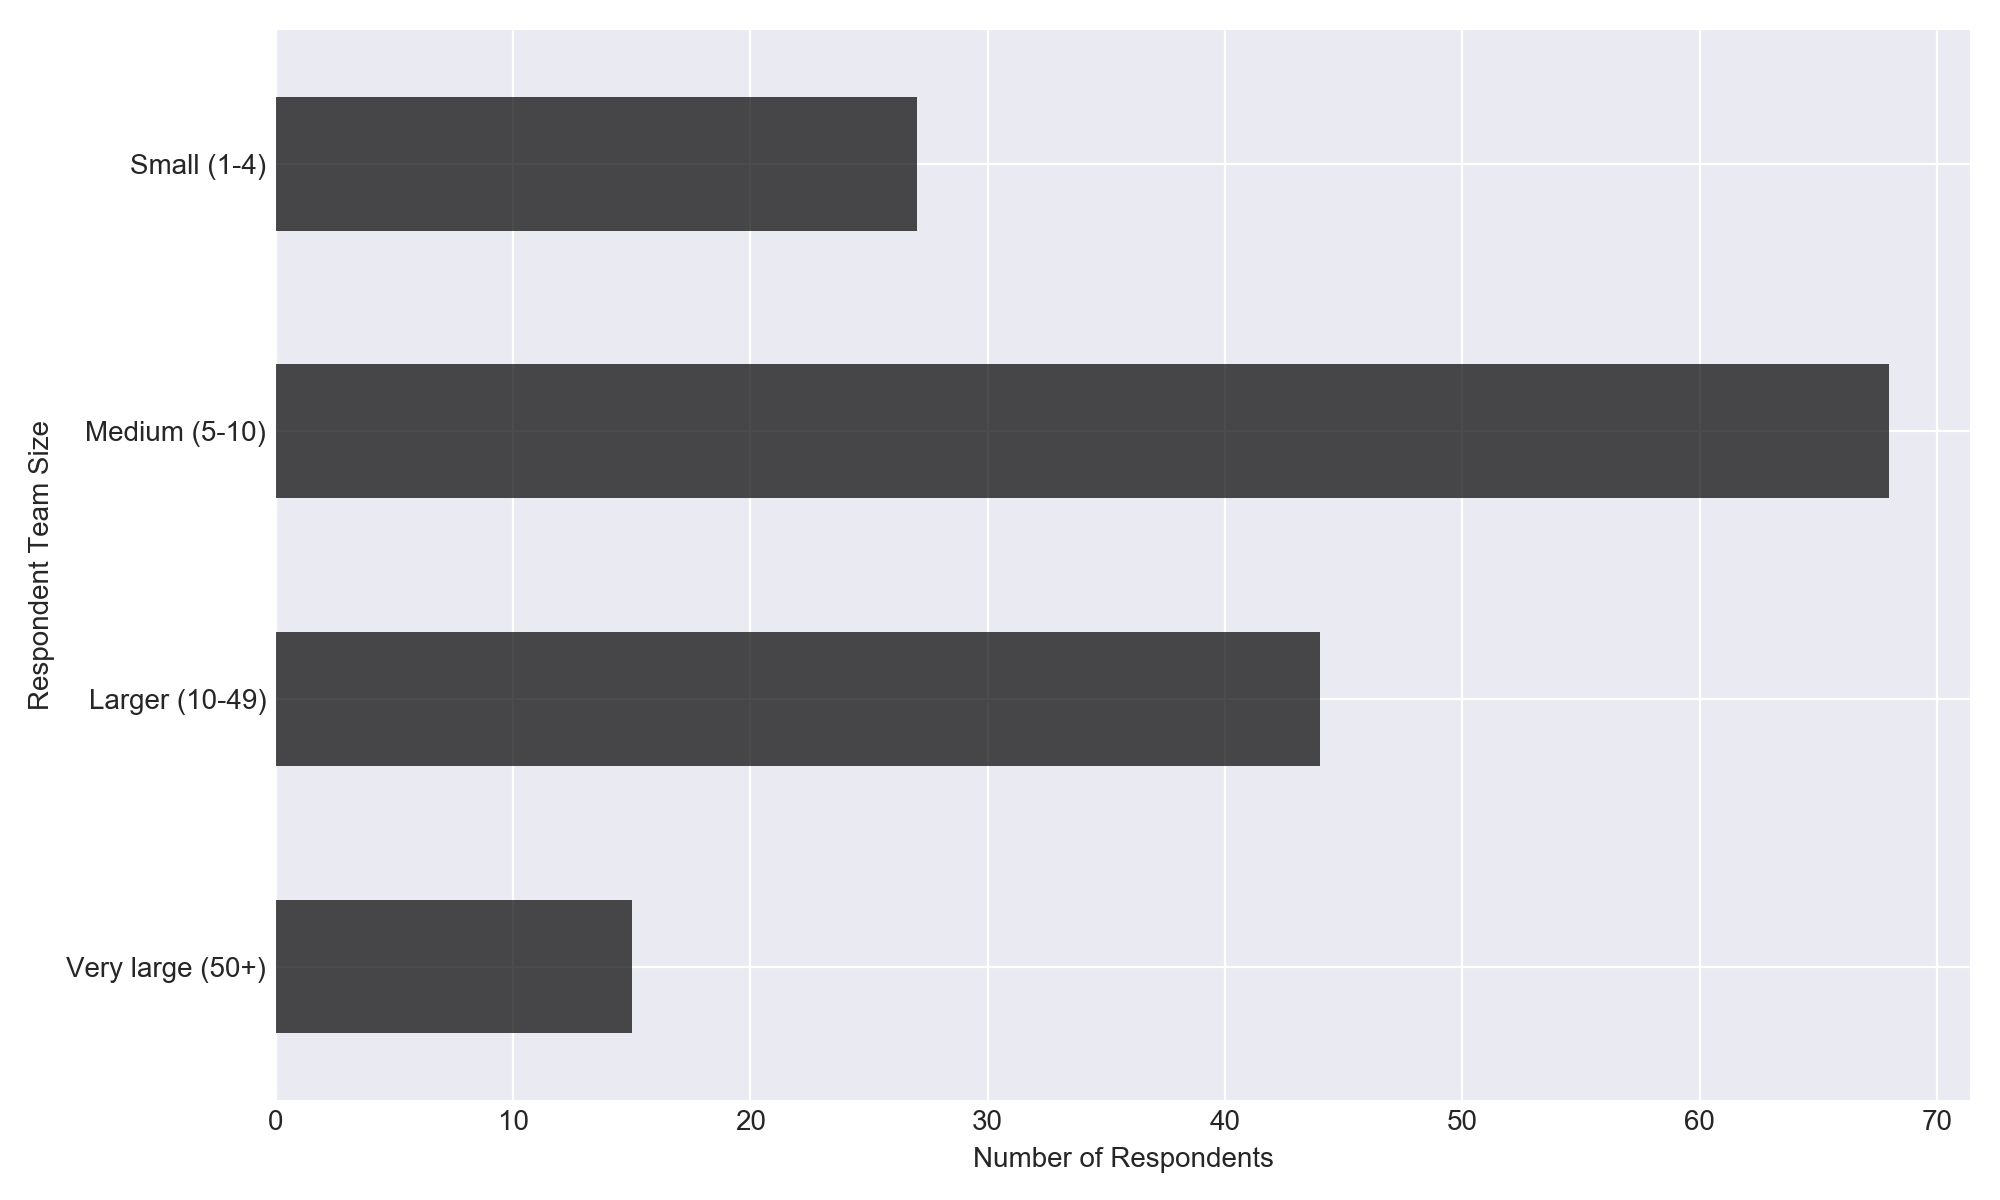

In [191]:
count_sample(dfdict['truth_metadata'],'v_14').loc[reversed(sizes)].plot.barh(
    color='k', alpha=0.7, legend=[], figsize=(10,6))
plt.xlabel('Number of Respondents')
plt.ylabel('Respondent Team Size')
plt.tight_layout()
#save_plot('respondents_per_teamsize_absolute')

In [145]:
count_sample(dfdict['truth_metadata'],'v_19_coded')

lfdn
v_19_coded                 
Aeronautics               8
Automotive               20
Consulting                3
E-Commerce                3
Education                 9
Energy                    4
Financial Services       20
Hardware                  3
Healthcare               10
ICT                      22
Industrial Automation     5
Infrastructure            6
Multiple Sectors         13
Other                     1
Public Sector            11
Robotics                  1
Software                  7
Tourism                   1
Transportation            7

<IPython.core.display.Javascript object>


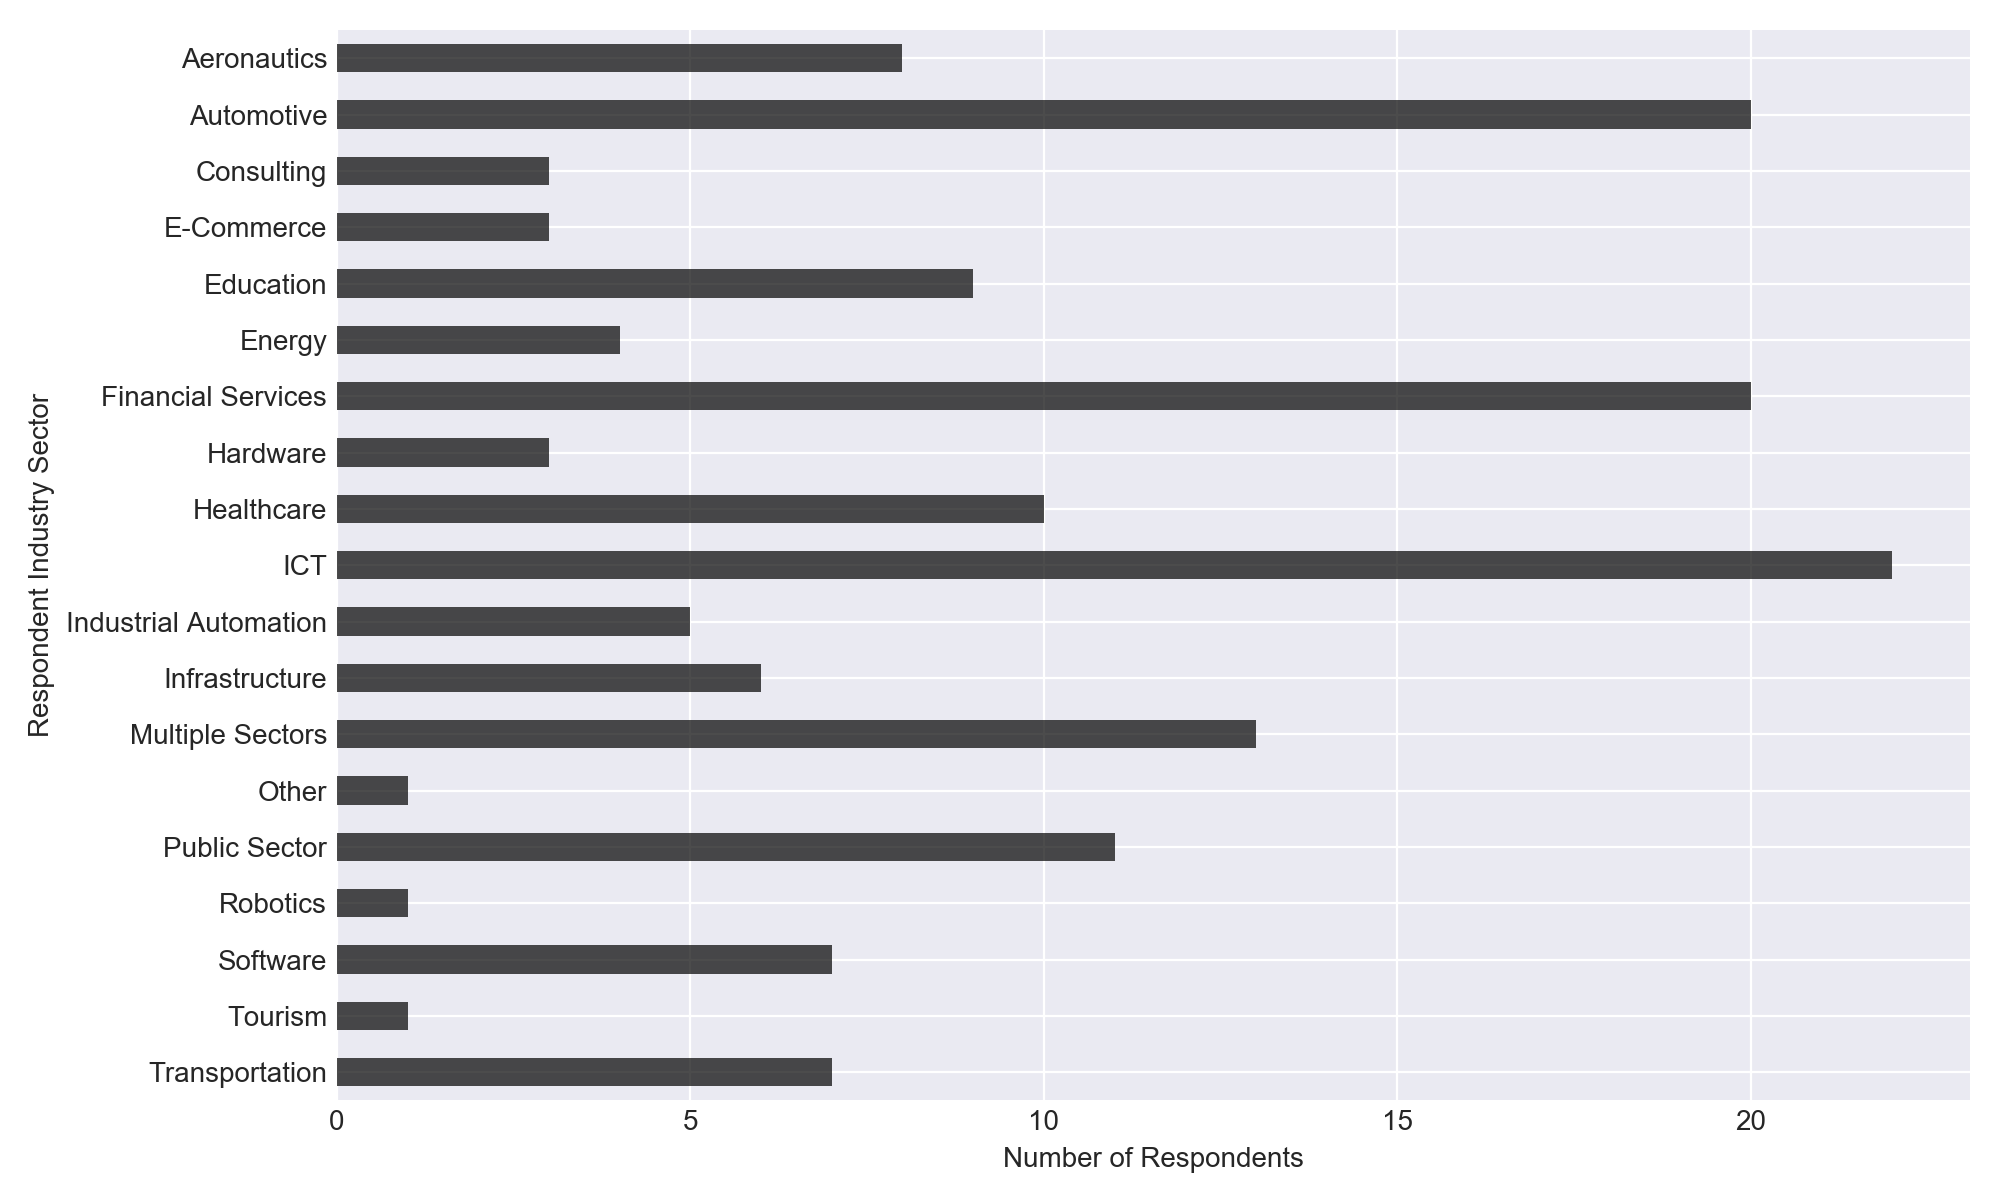

In [150]:
plot_sample(dfdict['truth_metadata'],'v_19_coded', 'Respondent Industry Sector')
#save_plot('respondents_per_sector_absolute')

In [151]:
count_sample(dfdict['truth_metadata'],'v_5_6_integrated')

lfdn
v_5_6_integrated           
Architect                16
Business Analyst         30
Coach                     2
Consultant                3
Designer                  1
Developer                11
Manager                   5
Multiple Roles            3
Other                     3
Process Designer          1
Product Owner             8
Project Manager          16
Requirements Engineer    37
Researcher                6
Tester / Test Manager    12

<IPython.core.display.Javascript object>


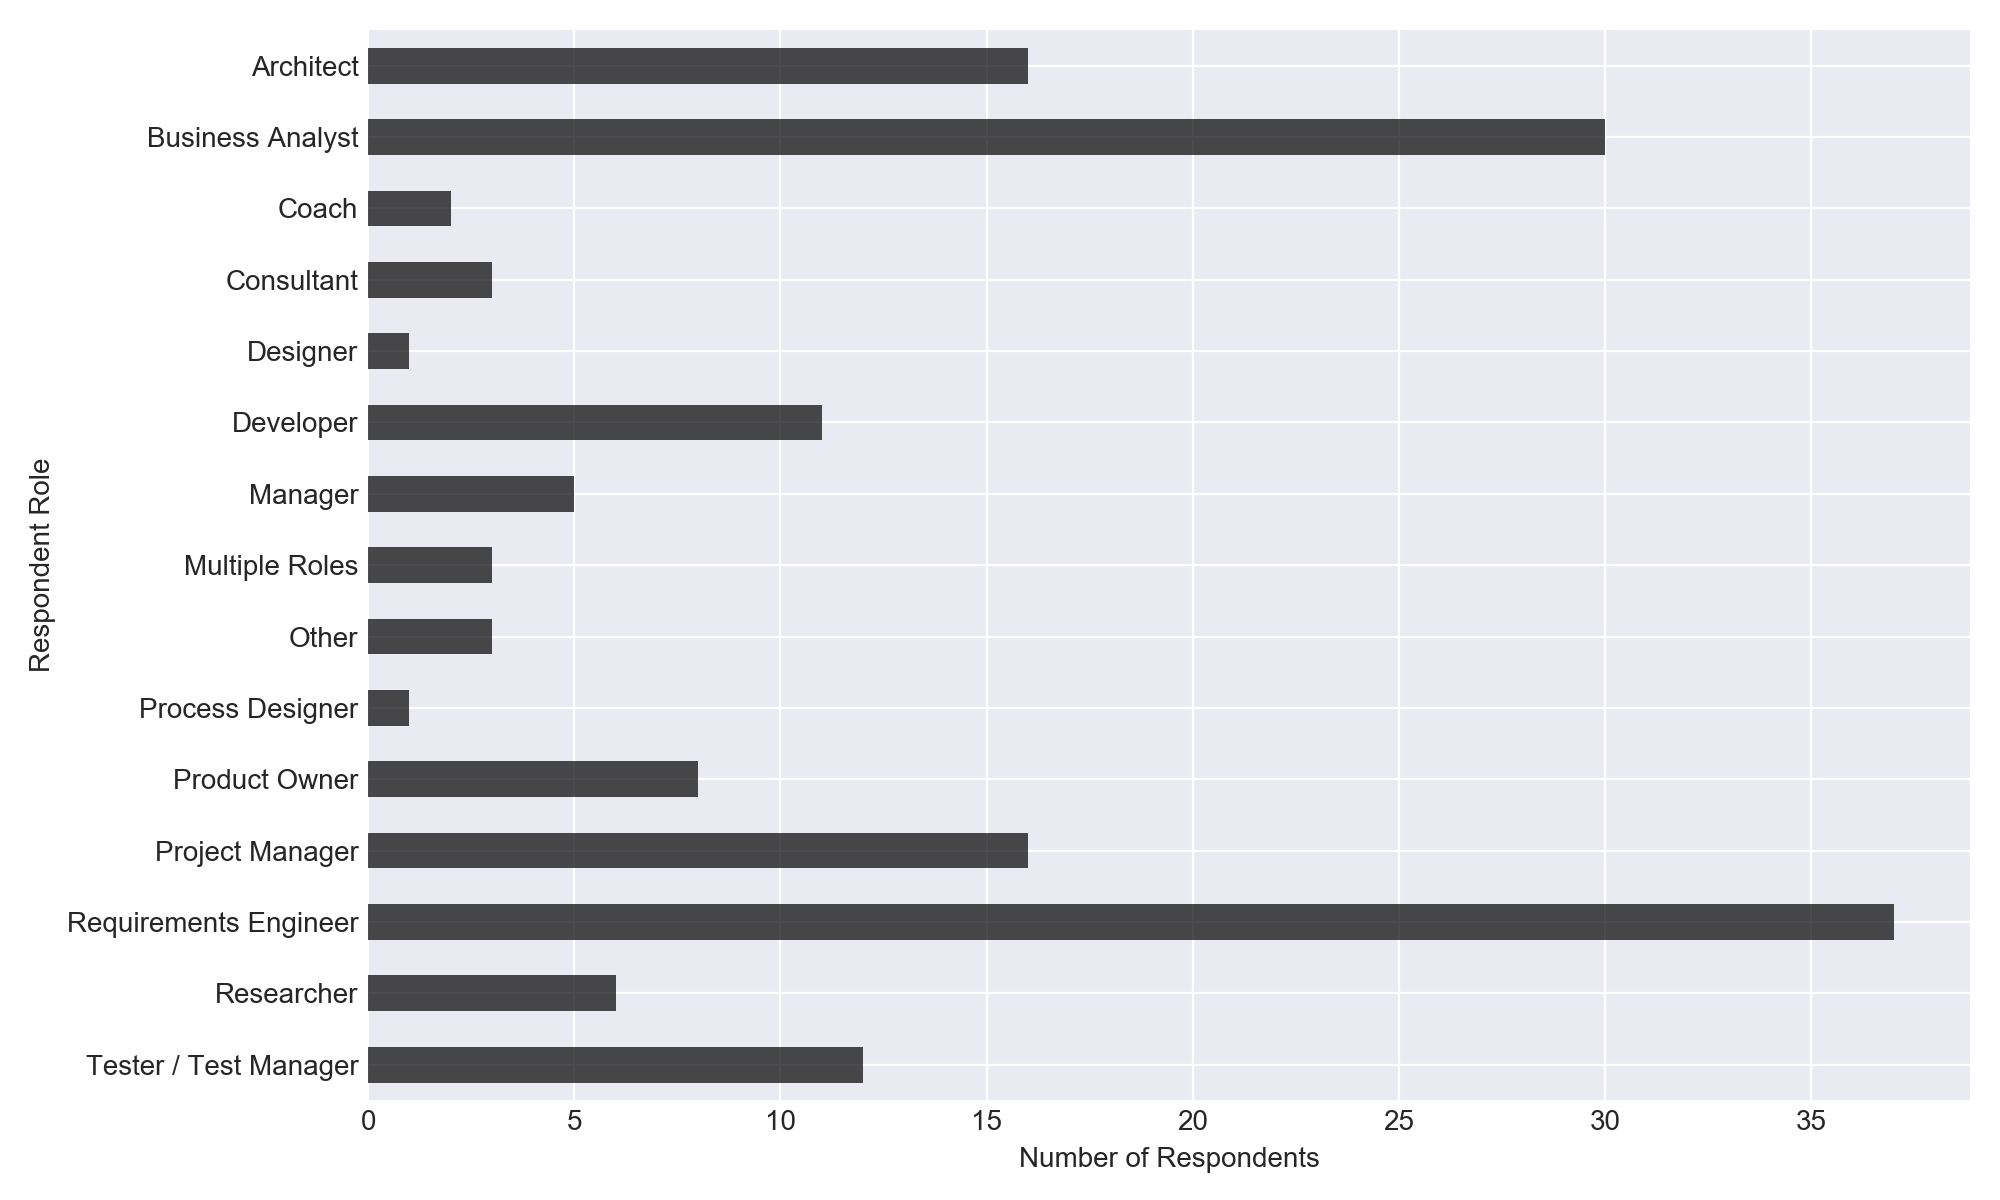

In [153]:
plot_sample(dfdict['truth_metadata'],'v_5_6_integrated', 'Respondent Role')
save_plot('respondents_per_role_absolute')

<IPython.core.display.Javascript object>


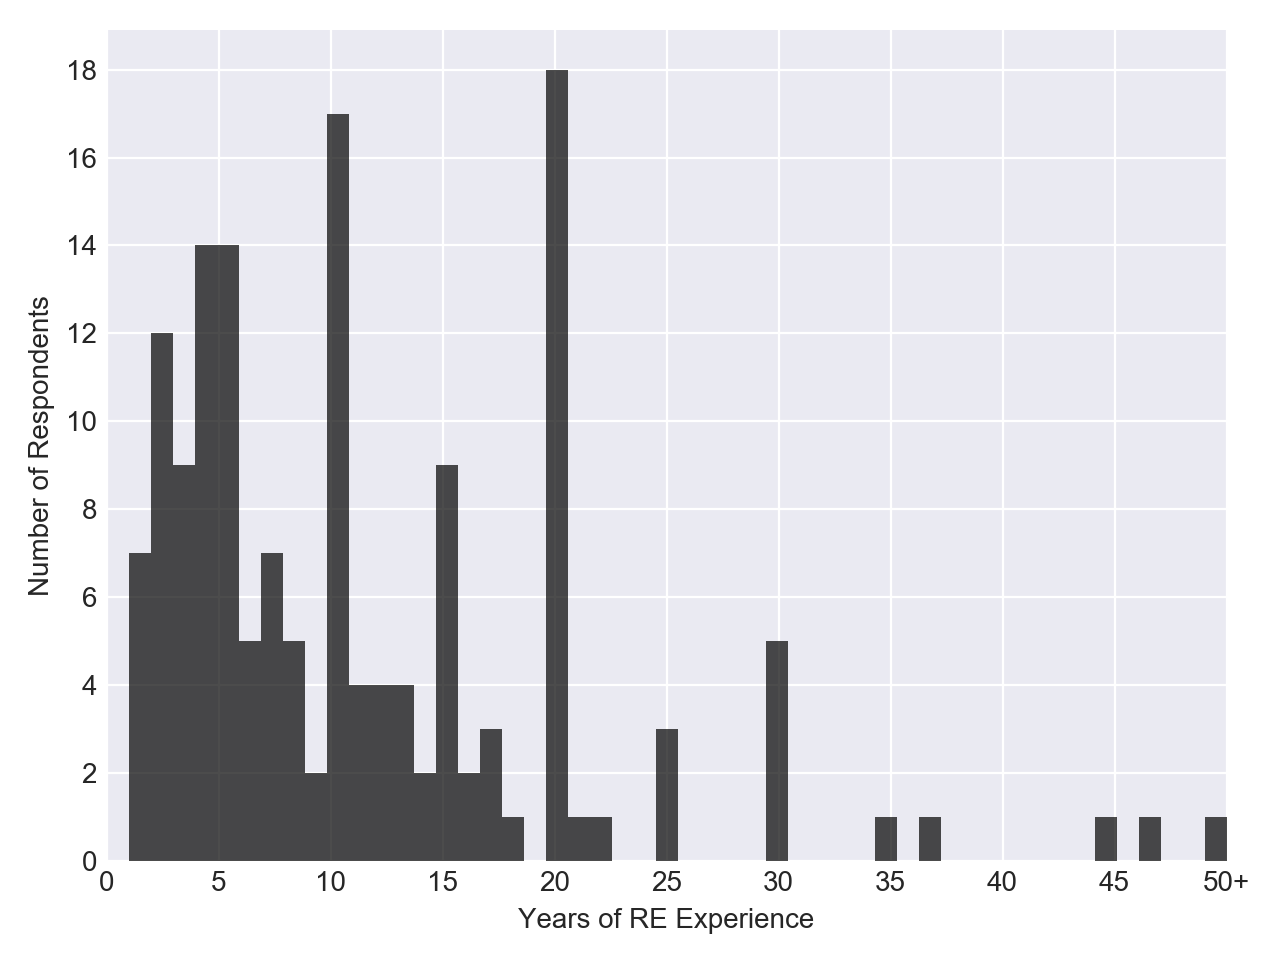

In [360]:
dfdict['truth_metadata'].v_11_coded.plot.hist(bins=50, color='k', alpha=0.7)
plt.xlim(0,50)
plt.xticks(range(0,51,5), list(range(0,50,5))+['50+'])
plt.xlabel('Years of RE Experience')
plt.ylabel('Number of Respondents')
plt.yticks(range(0,19,2))
plt.tight_layout()
#save_plot('respondents_years_experience_histogram')

<IPython.core.display.Javascript object>


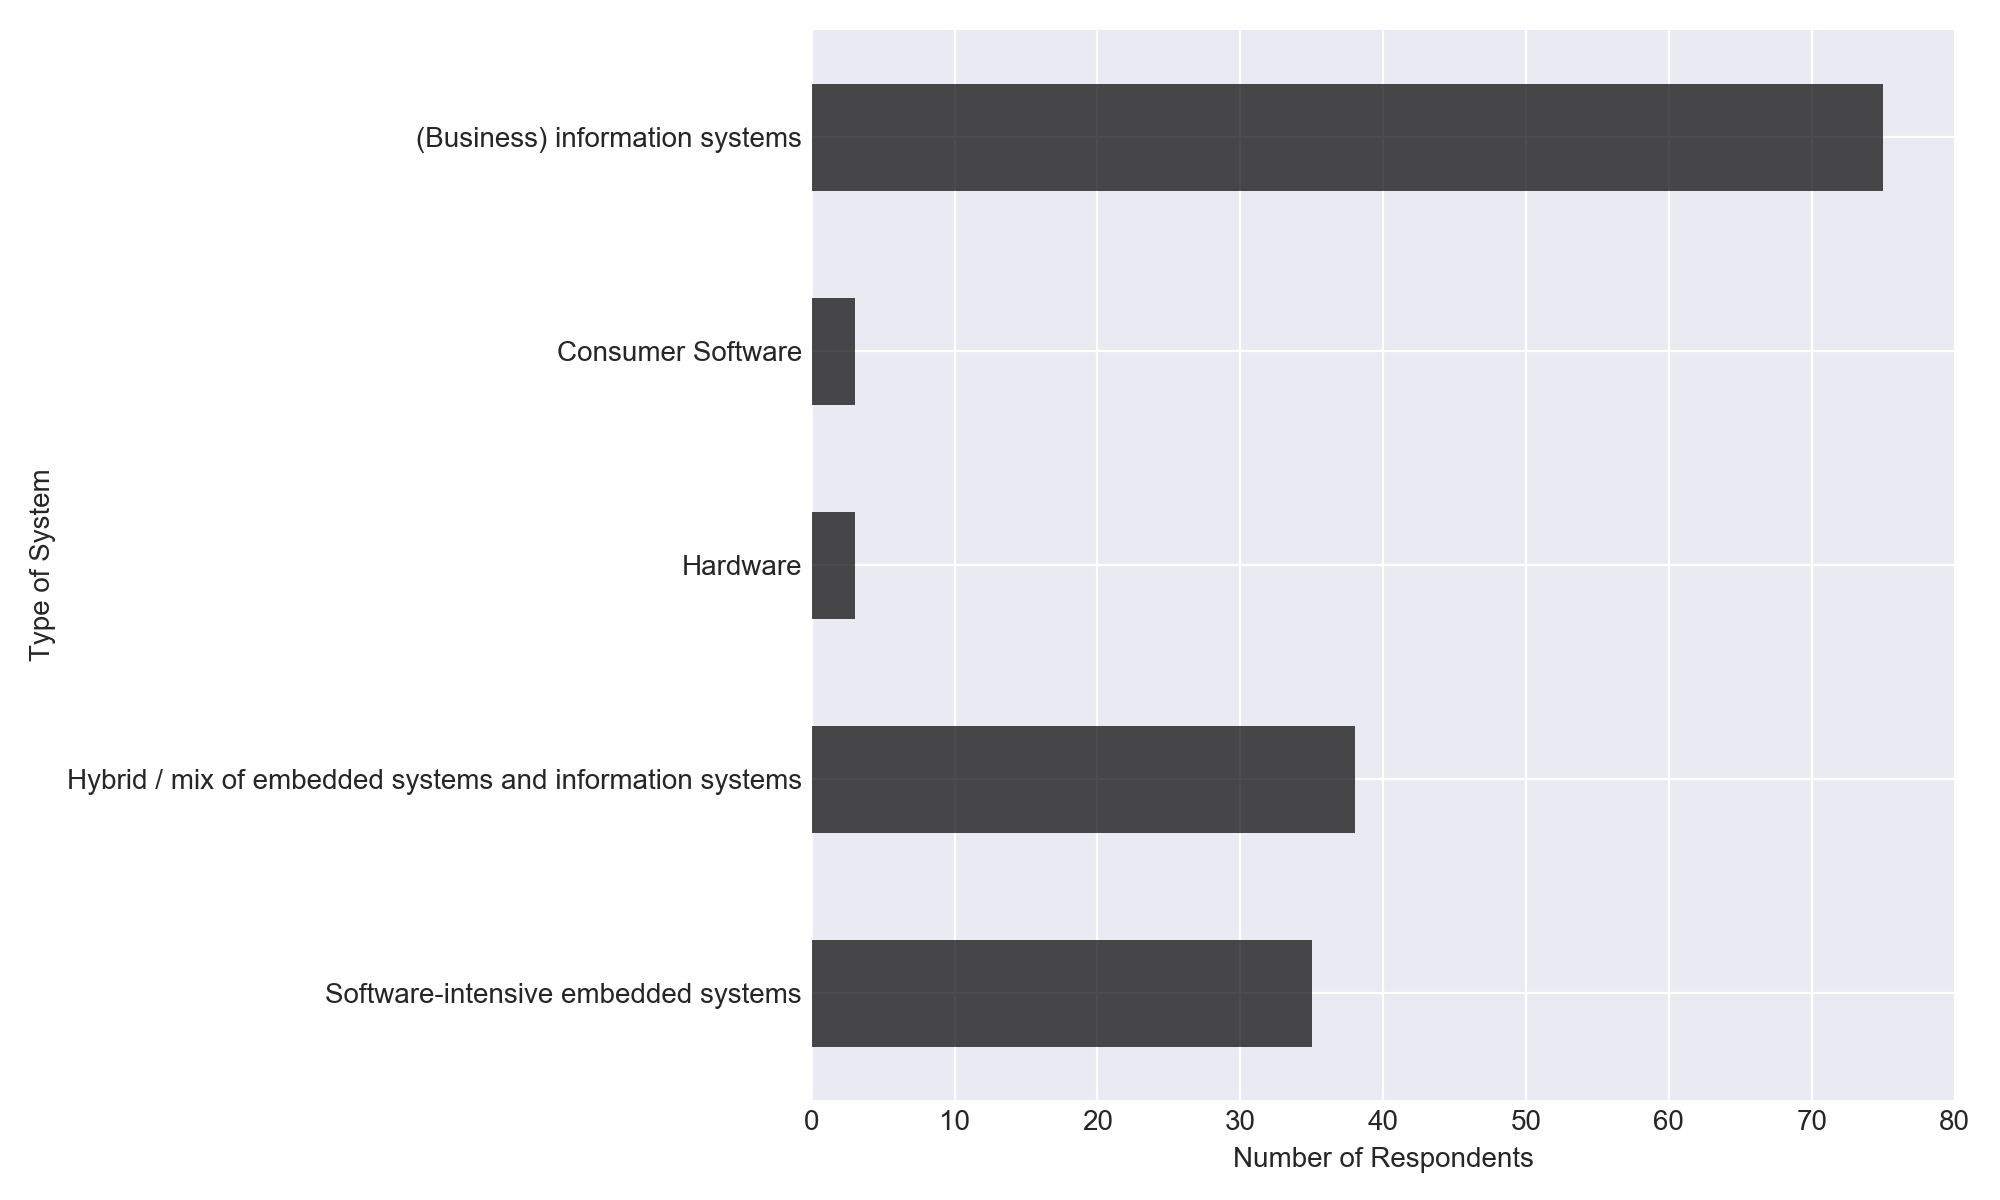

In [311]:
plot_sample(dfdict['truth_metadata'],'v_15_16_integrated', 'Type of System')
plt.xlim(0,80)
plt.tight_layout()
#save_plot('respondents_system_type_absolute')

#### CS Degree

In [348]:
count_sample(dfdict['truth_metadata'],'v_12') / len(dfdict['truth_metadata'])

lfdn
v_12         
No    0.24026
Yes   0.75974

<IPython.core.display.Javascript object>


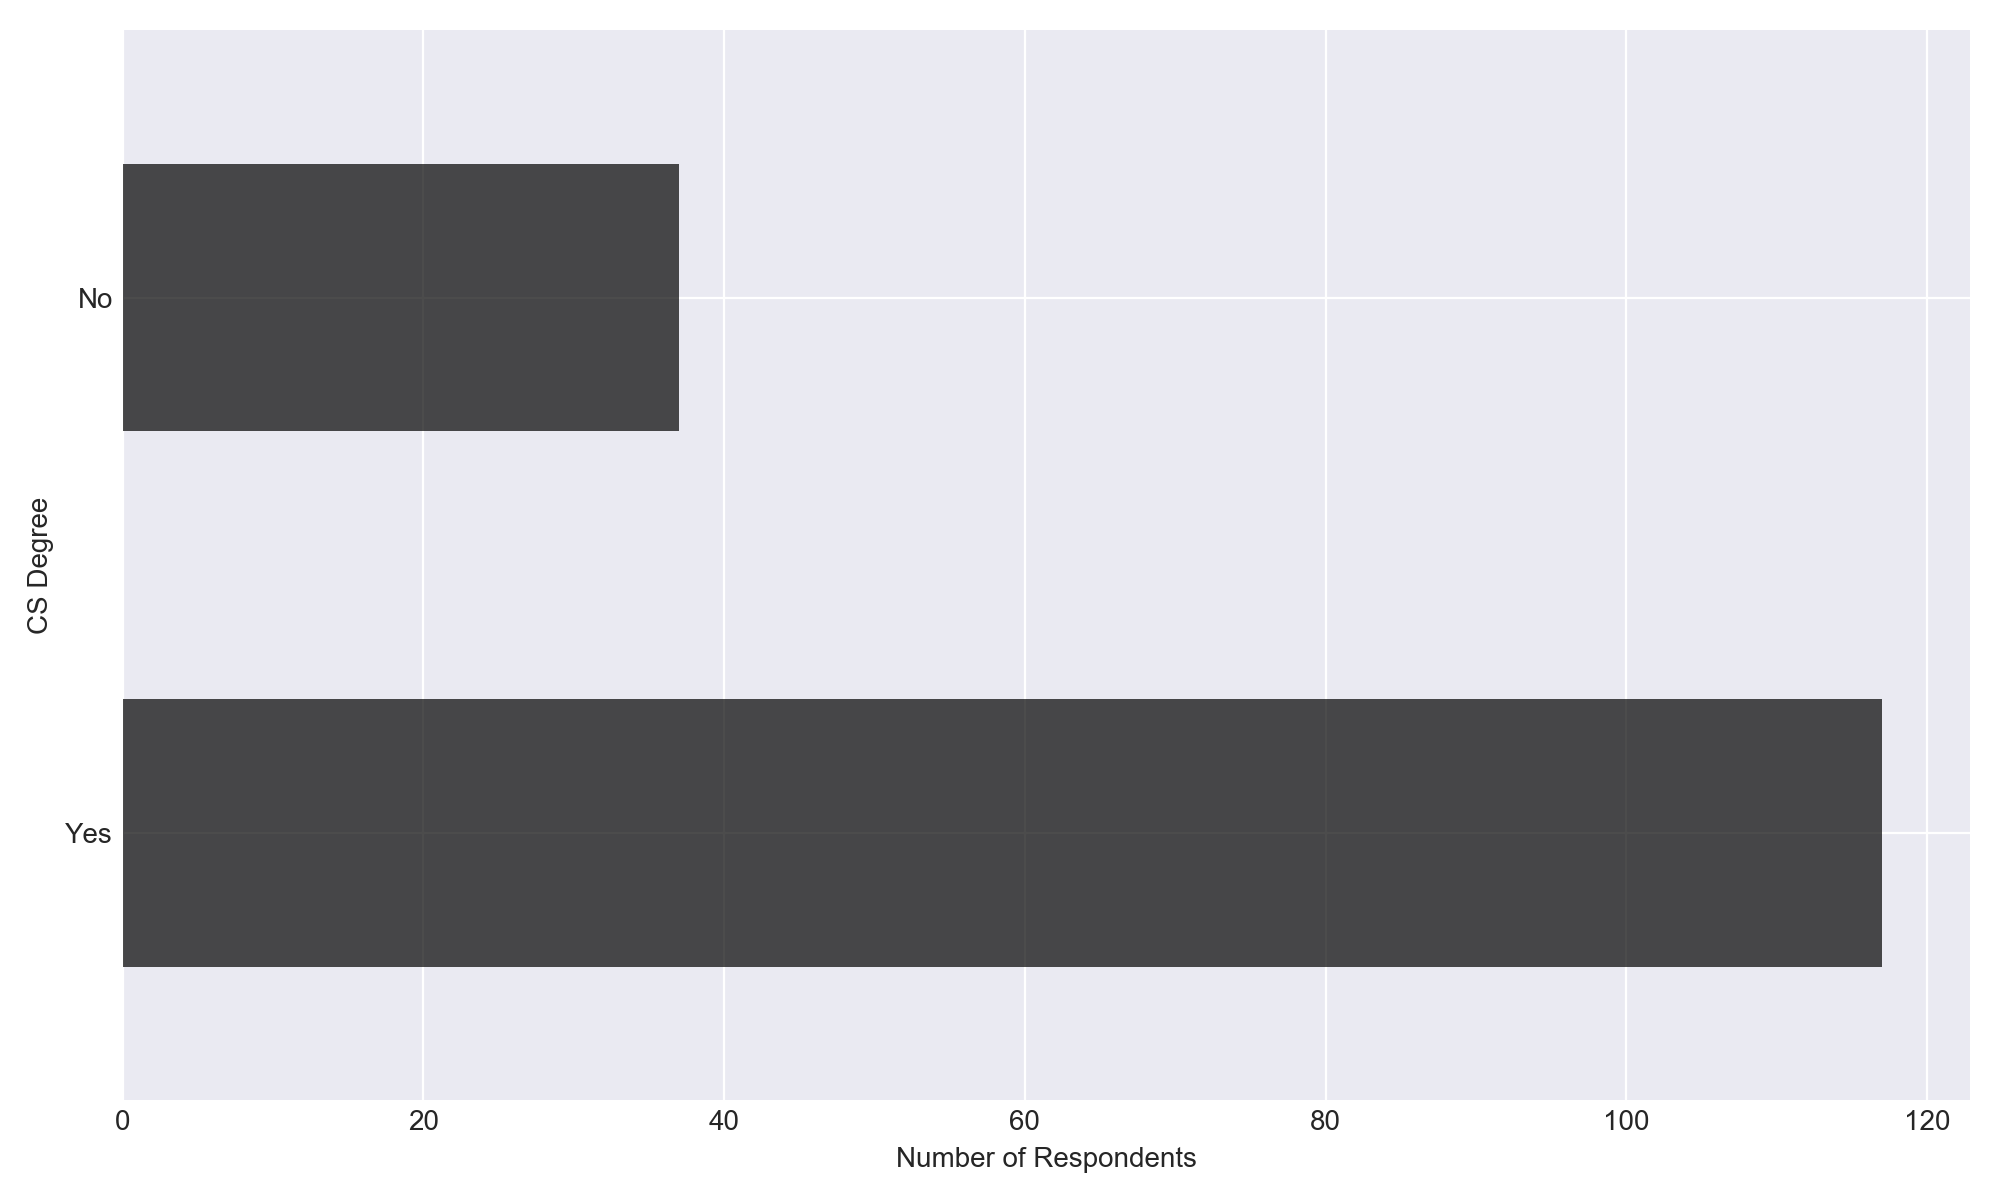

In [330]:
plot_sample(dfdict['truth_metadata'],'v_12', 'CS Degree')
#save_plot('respondents_csdegree_absolute')

### Crosstabs of Respondent Characteristics

In [288]:
def crosstab_df(df, var1, var2, margins=False):
    return pd.crosstab(df[var1],
            df[var2], margins=margins)

def heatmap_df(df, var1, var2, var1name, var2name, cmap='Greys', square=True, robust=False):
    sns.heatmap(crosstab_df(df, var1, var2), cmap=cmap, square=square, robust=robust)
    plt.xlabel(var2name)
    plt.ylabel(var1name)
    plt.tight_layout()

#### Role and Sector

<IPython.core.display.Javascript object>


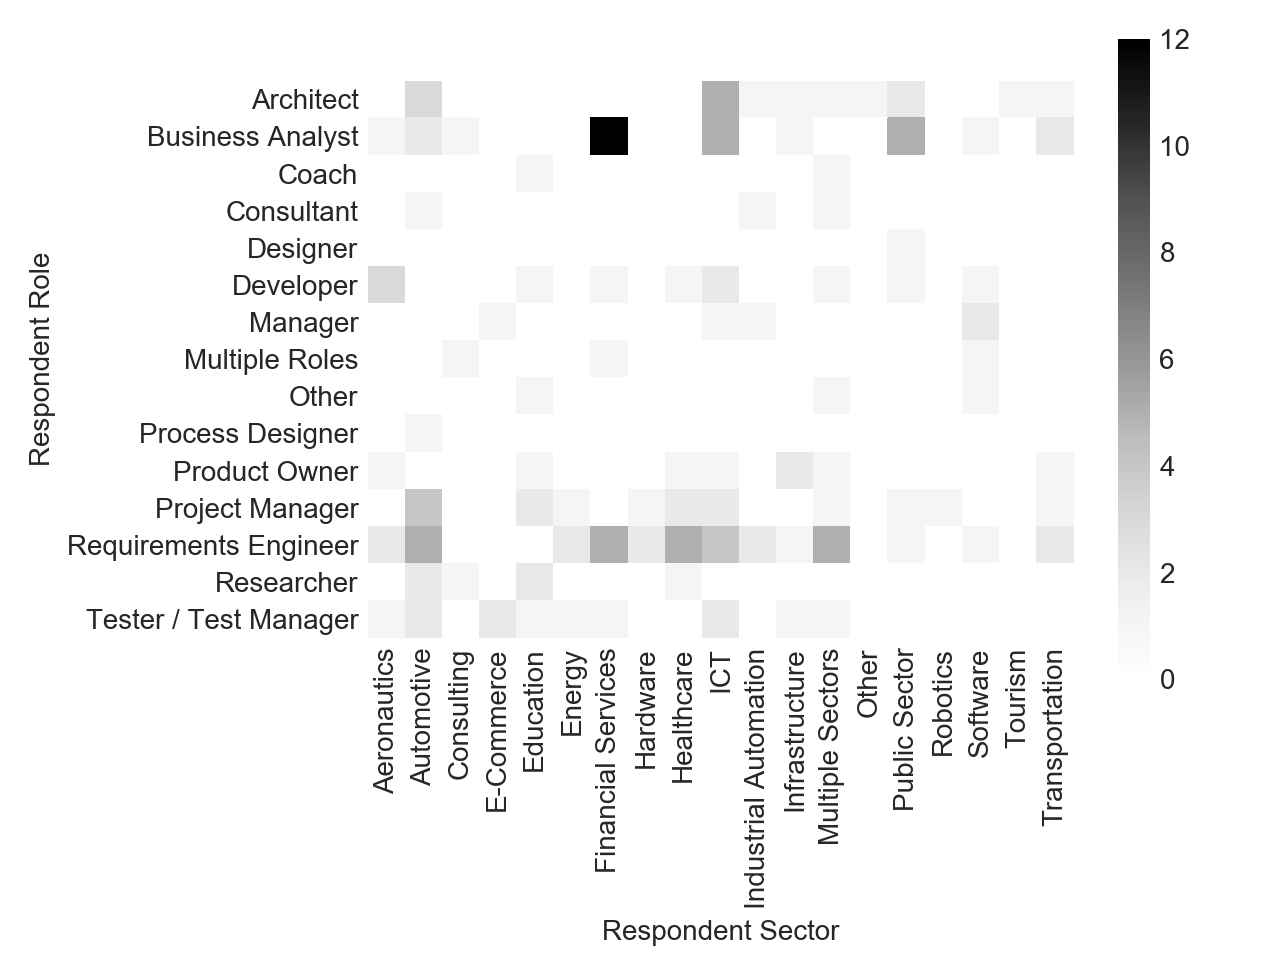

In [324]:
heatmap_df(dfdict['truth_metadata'], 'v_5_6_integrated','v_19_coded', 'Respondent Role', 'Respondent Sector')
#save_plot('respondents_role_sector_absolute')

#### Role and CS Degree

<IPython.core.display.Javascript object>


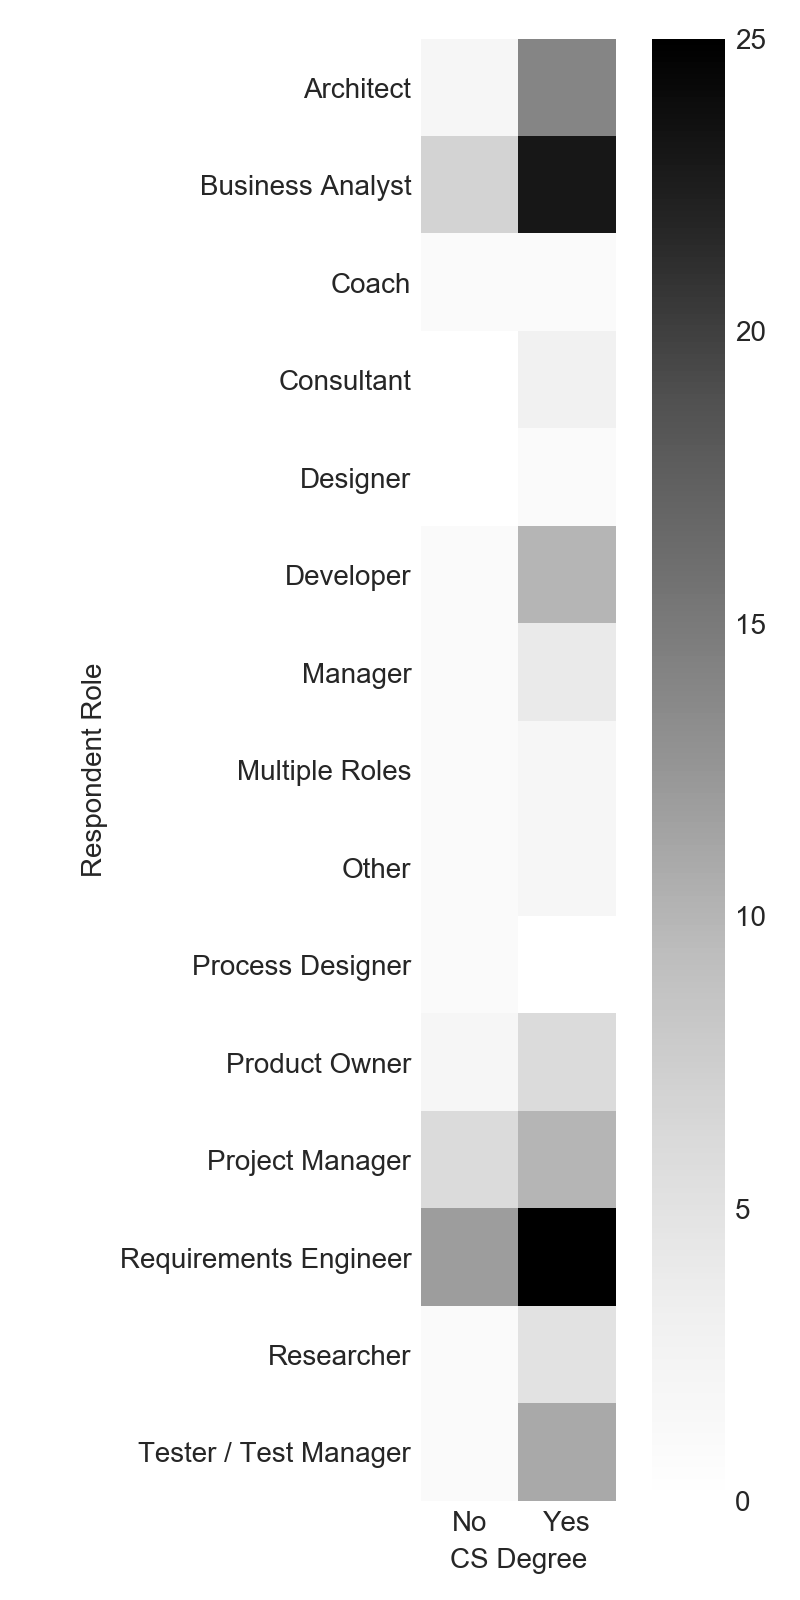

In [343]:
plt.figure(figsize=(4,8))
heatmap_df(dfdict['truth_metadata'], 'v_5_6_integrated', 'v_12', 'Respondent Role', 'CS Degree')
#save_plot('respondents_role_csdegree_absolute')

#### Sector and CS Degree

<IPython.core.display.Javascript object>


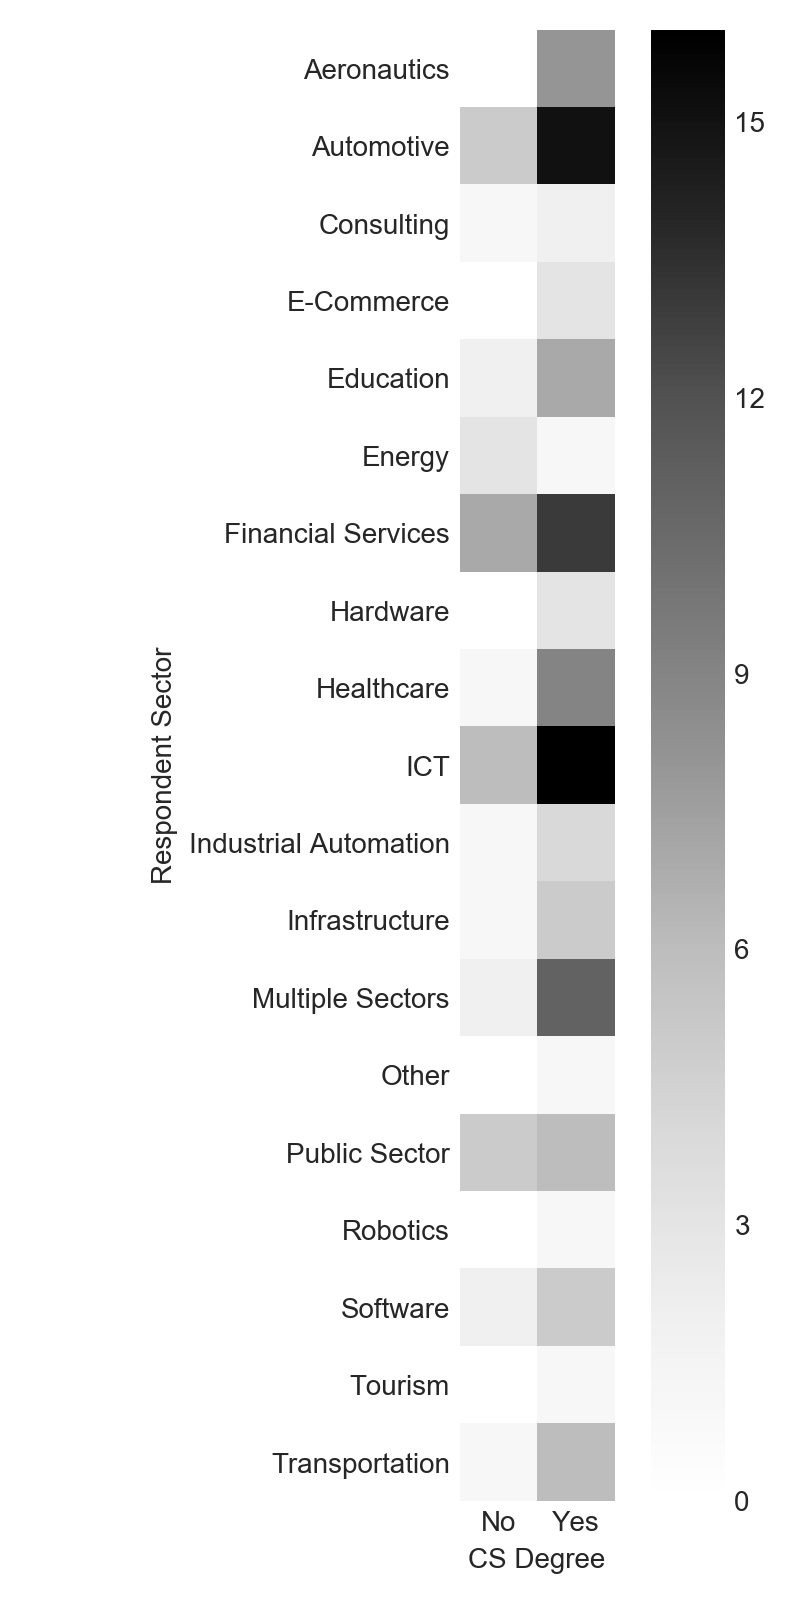

In [344]:
plt.figure(figsize=(4,8))
heatmap_df(dfdict['truth_metadata'], 'v_19_coded', 'v_12', 'Respondent Sector', 'CS Degree')
#save_plot('respondents_sector_csdegree_absolute')

#### Country and CS Degree

<IPython.core.display.Javascript object>


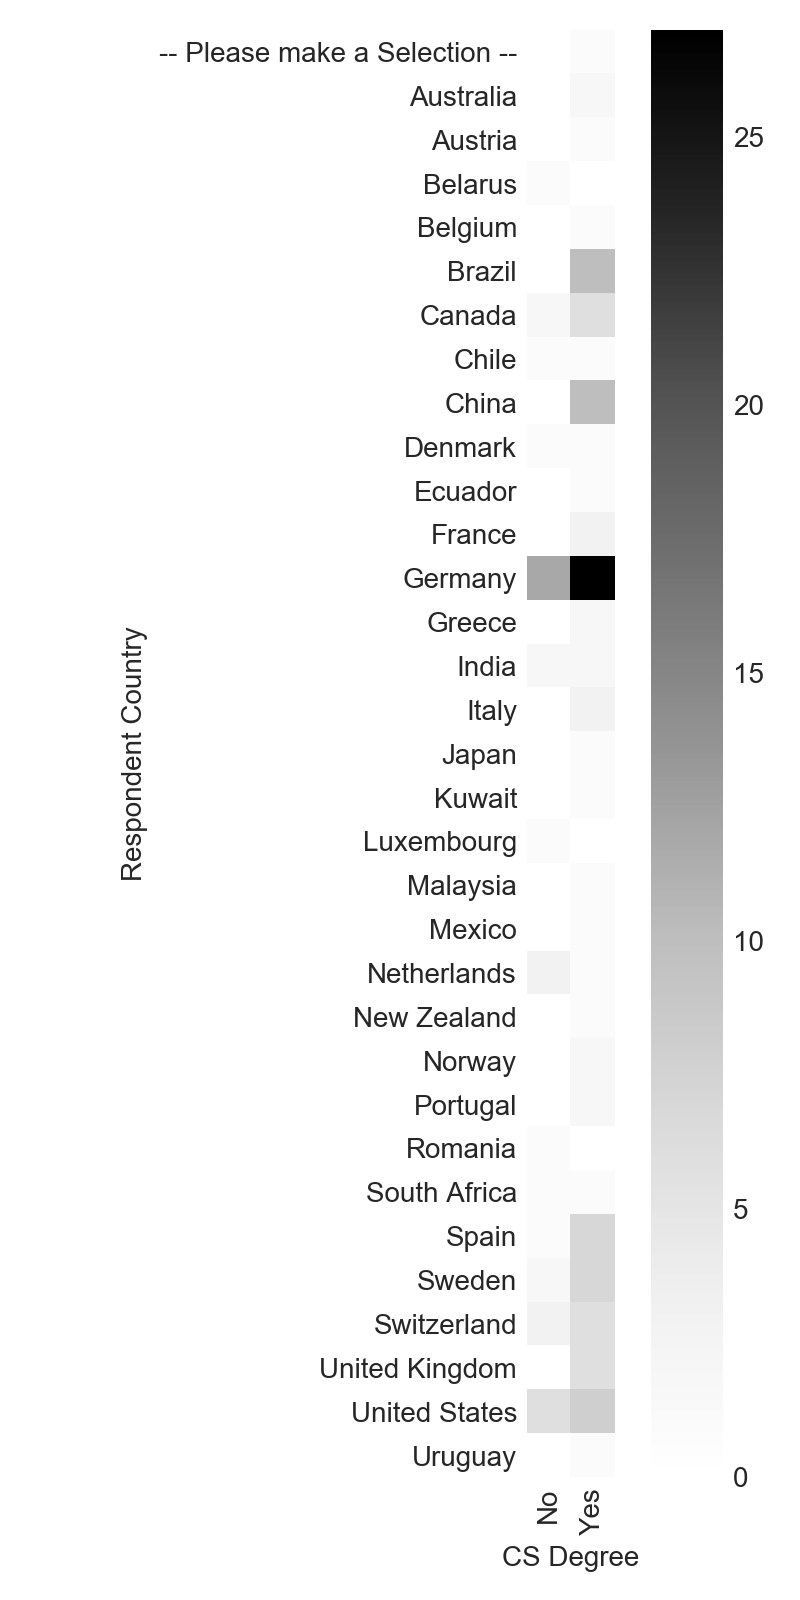

In [341]:
plt.figure(figsize=(4,8))
heatmap_df(dfdict['truth_metadata'], 'v_124', 'v_12', 'Respondent Country', 'CS Degree')
#save_plot('respondents_country_csdegree_absolute')

#### Type of System and Sector

<IPython.core.display.Javascript object>


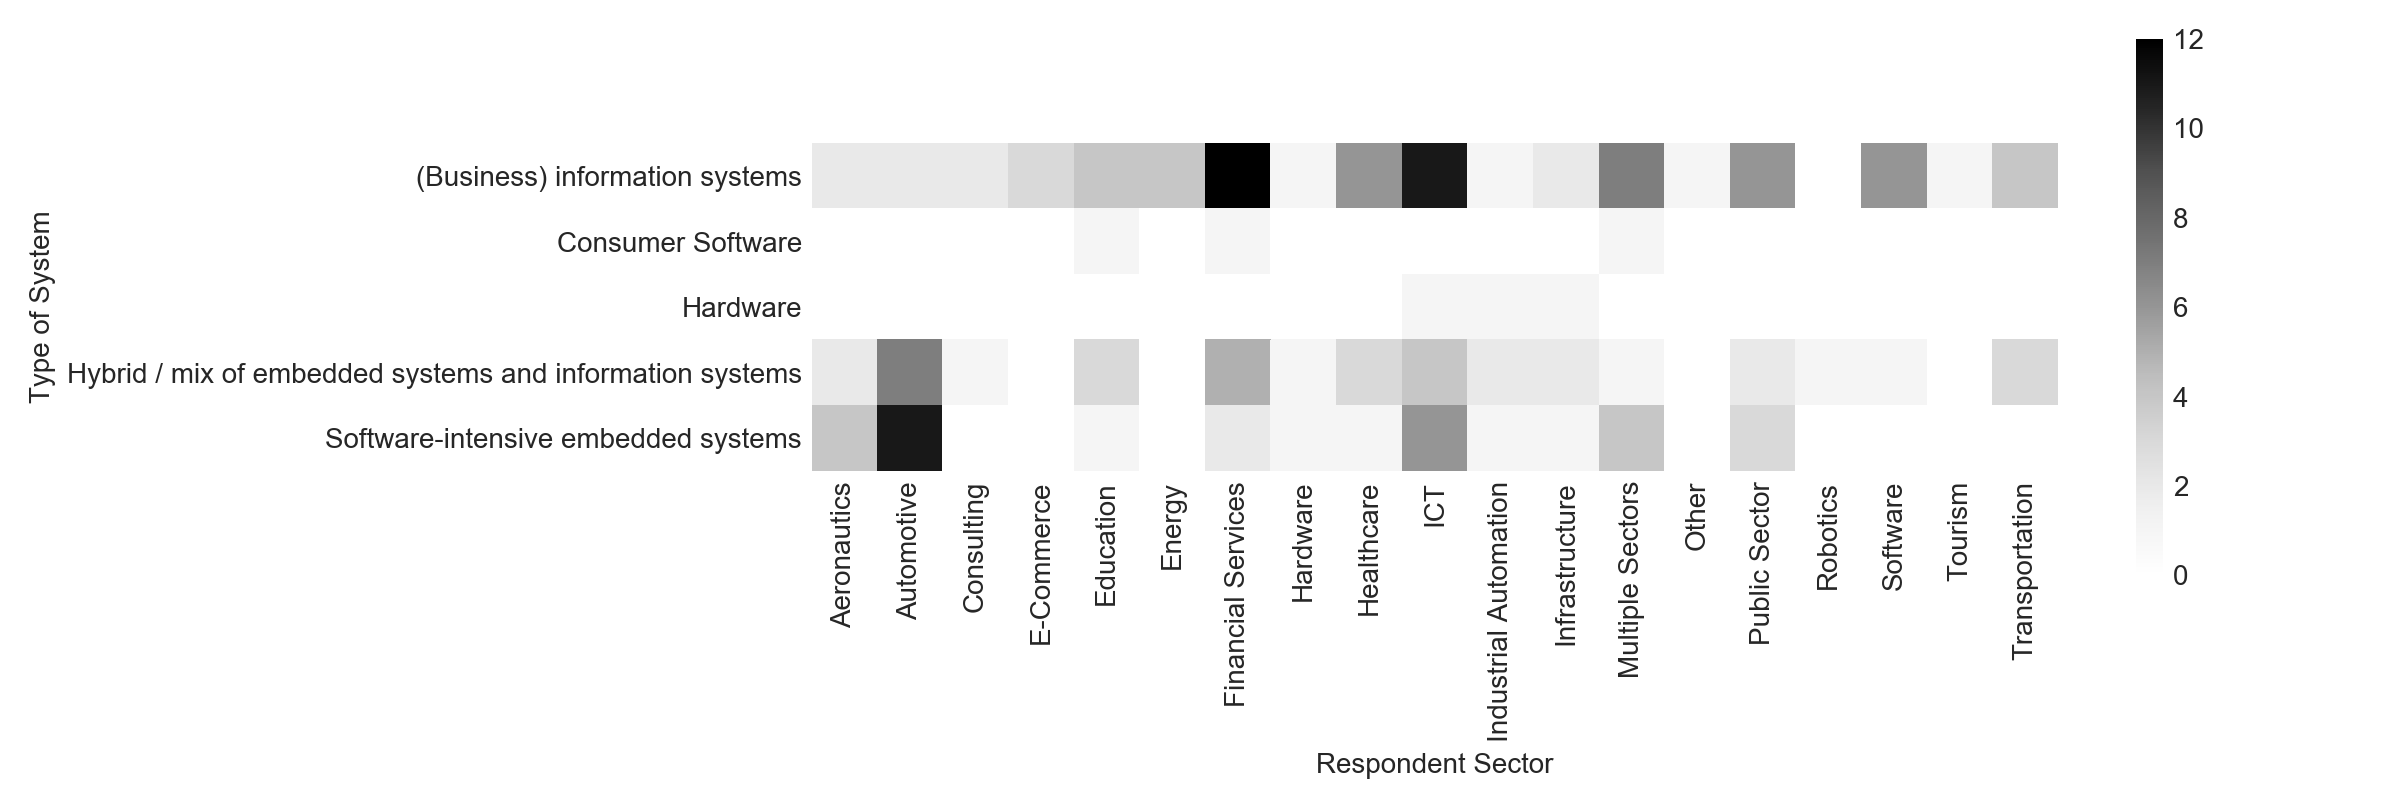

In [325]:
plt.figure(figsize=(12,4))
heatmap_df(dfdict['truth_metadata'], 'v_15_16_integrated','v_19_coded', 'Type of System', 'Respondent Sector')
#save_plot('respondents_system_type_sector_absolute')

#### Country and Role

<IPython.core.display.Javascript object>


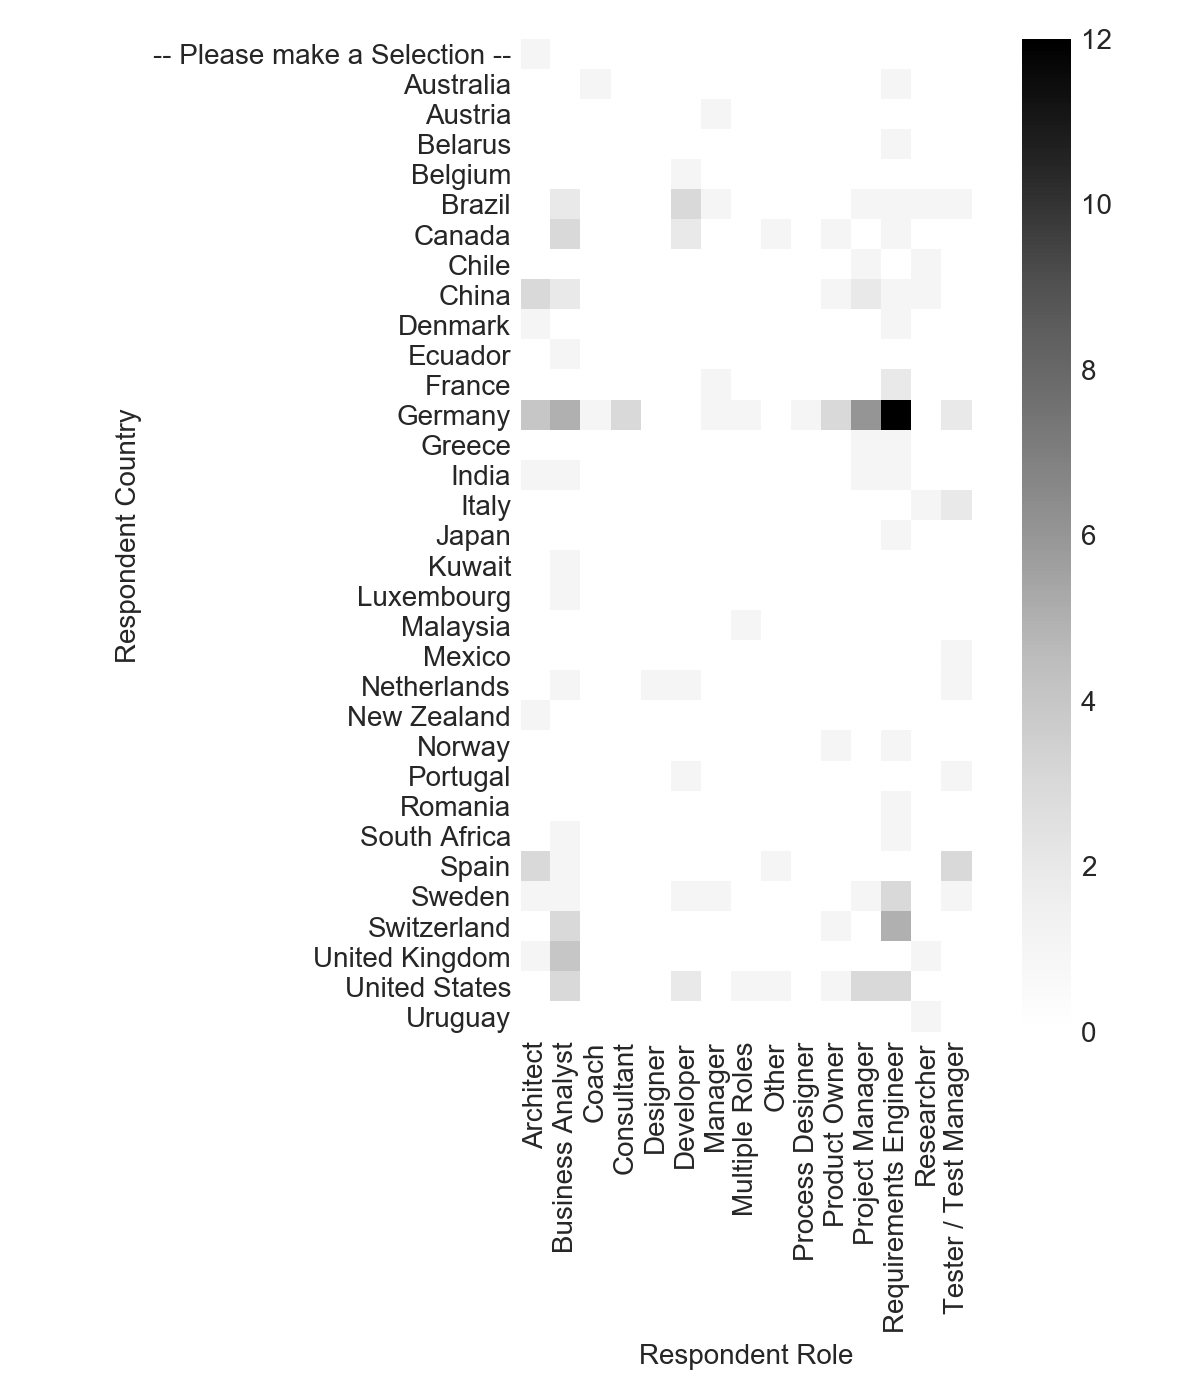

In [326]:
plt.figure(figsize=(6,7))
heatmap_df(dfdict['truth_metadata'], 'v_124','v_5_6_integrated', 'Respondent Country', 'Respondent Role')
#save_plot('respondents_country_role_absolute')

#### Country and Sector

<IPython.core.display.Javascript object>


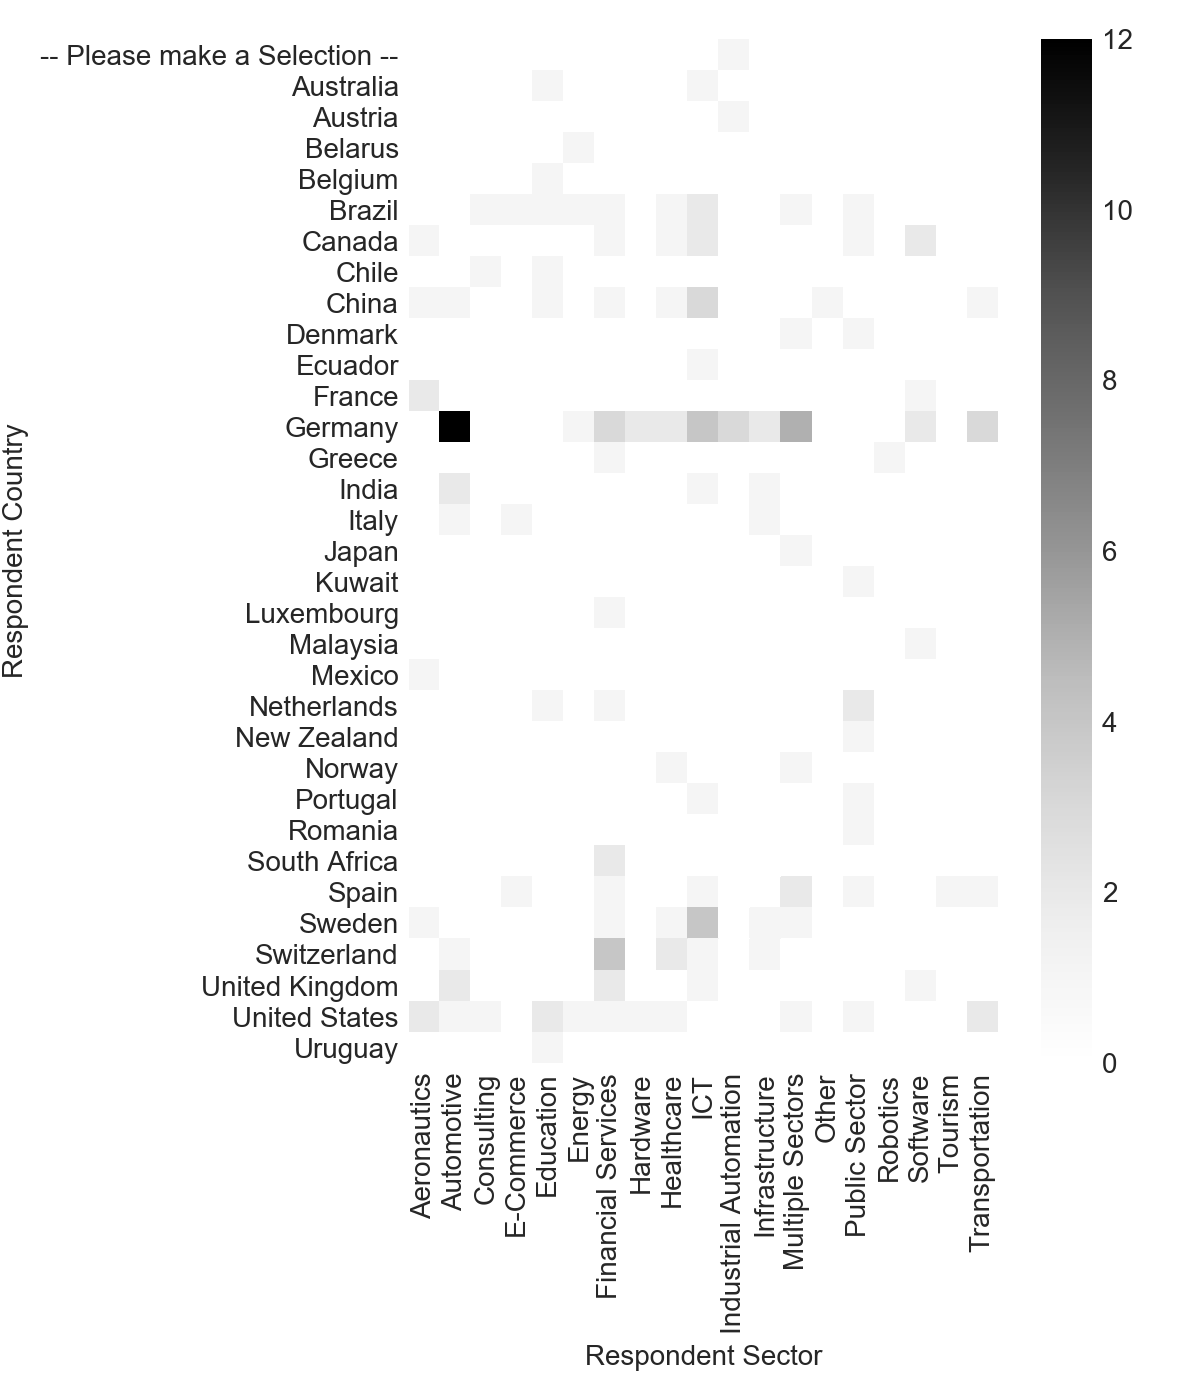

In [327]:
plt.figure(figsize=(6,7))
heatmap_df(dfdict['truth_metadata'],'v_124', 'v_19_coded', 'Respondent Country', 'Respondent Sector')
#save_plot('respondents_country_sector_absolute')

In [296]:
crosstab_df(dfdict['truth_metadata'],'v_124', 'v_19_coded', margins=True)

v_19_coded                     Aeronautics  Automotive  Consulting  \
v_124                                                                
-- Please make a Selection --            0           0           0   
Australia                                0           0           0   
Austria                                  0           0           0   
Belarus                                  0           0           0   
Belgium                                  0           0           0   
Brazil                                   0           0           1   
Canada                                   1           0           0   
Chile                                    0           0           1   
China                                    1           1           0   
Denmark                                  0           0           0   
Ecuador                                  0           0           0   
France                                   2           0           0   
Germany                                  0          12           0   
Greece                                   0           0           0   
India                                    0           2           0   
Italy                                    0           1           0   
Japan                                    0           0           0   
Kuwait                                   0           0           0   
Luxembourg                               0           0           0   
Malaysia                                 0           0           0   
Mexico                                   1           0           0   
Netherlands                              0           0           0   
New Zealand                              0           0           0   
Norway                                   0           0           0   
Portugal                                 0           0           0   
Romania                                  0           0           0   
South Africa                             0           0           0   
Spain                                    0           0           0   
Sweden                                   1           0           0   
Switzerland                              0           1           0   
United Kingdom                           0           2           0   
United States                            2           1           1   
Uruguay                                  0           0           0   
All                                      8          20           3   

v_19_coded                     E-Commerce  Education  Energy  \
v_124                                                          
-- Please make a Selection --           0          0       0   
Australia                               0          1       0   
Austria                                 0          0       0   
Belarus                                 0          0       1   
Belgium                                 0          1       0   
Brazil                                  1          1       1   
Canada                                  0          0       0   
Chile                                   0          1       0   
China                                   0          1       0   
Denmark                                 0          0       0   
Ecuador                                 0          0       0   
France                                  0          0       0   
Germany                                 0          0       1   
Greece                                  0          0       0   
India                                   0          0       0   
Italy                                   1          0       0   
Japan                                   0          0       0   
Kuwait                                  0          0       0   
Luxembourg                              0          0       0   
Malaysia                                0          0       0   
Mexico                                  0          0       0   
Netherl

In [353]:
# look at more than 2 dimensions
dfdict['truth_metadata'][['lfdn', 'v_124', 'v_19_coded', 'v_5_6_integrated']].groupby(['v_124', 'v_19_coded', 'v_5_6_integrated']).count().sort_values('lfdn', ascending=False)

lfdn
v_124          v_19_coded            v_5_6_integrated           
Germany        Automotive            Requirements Engineer     3
               ICT                   Project Manager           2
United States  Aeronautics           Developer                 2
France         Aeronautics           Requirements Engineer     2
Germany        Automotive            Project Manager           2
                                     Tester / Test Manager     2
               Financial Services    Business Analyst          2
China          ICT                   Architect                 2
Switzerland    Financial Services    Business Analyst          2
                                     Requirements Engineer     2
               Healthcare            Requirements Engineer     2
Germany        Industrial Automation Requirements Engineer     2
United Kingdom Financial Services    Business Analyst          2
Germany        Automotive            Architect                 2
               Multiple Sectors      Requirements Engineer     2
Netherlands    Public Sector         Business Analyst          1
South Africa   Financial Services    Business Analyst          1
Spain          Multiple Sectors      Other                     1
Italy          Automotive            Researcher                1
Spain          ICT                   Architect                 1
Italy          E-Commerce            Tester / Test Manager     1
               Infrastructure        Tester / Test Manager     1
Japan          Multiple Sectors      Requirements Engineer     1
Spain          Financial Services    Tester / Test Manager     1
Kuwait         Public Sector         Business Analyst          1
Luxembourg     Financial Services    Business Analyst          1
Spain          E-Commerce            Tester / Test Manager     1
South Africa   Financial Services    Requirements Engineer     1
Romania        Public Sector         Requirements Engineer     1
Netherlands    Public Sector         Designer                  1
...                                                          ...
Germany        ICT                   Product Owner             1
Greece         Robotics              Project Manager           1
               Financial Services    Requirements Engineer     1
Australia      Education             Coach                     1
Germany        Transportation        Product Owner             1
                                     Business Analyst          1
               Software              Requirements Engineer     1
                                     Manager                   1
               Multiple Sectors      Consultant                1
                                     Coach                     1
                                     Architect                 1
               Infrastructure        Product Owner             1
                                     Business Analyst          1
               Industrial Automation Consultant                1
               ICT                   Architect                 1
China          Transportation        Project Manager           1
Germany        Healthcare            Requirements Engineer     1
                                     Project Manager           1
               Hardware              Requirements Engineer     1
                                     Project Manager           1
               Financial Services    Multiple Roles            1
               Energy                Requirements Engineer     1
               Automotive            Process Designer          1
                                     Consultant                1
                                     Business Analyst          1
France         Software              Manager                   1
Ecuador        ICT                   Business Analyst          1
Denmark        Public Sector         Architect                 1
               Multiple Sectors      Requirements Engineer     1
Uruguay        Education      

In [356]:
dfdict['truth_metadata']['v_11_coded'].median()

10.0

## Section 3.2 - Introduction: Basic Statistics

#### How many people gave the full fifteen ratings?

In [43]:
c = dfdict['truth_ratings'].groupby('lfdn').count()
c[c.rating >= 15].shape

(113, 2)

#### Distribution of Ratings over Papers

<IPython.core.display.Javascript object>


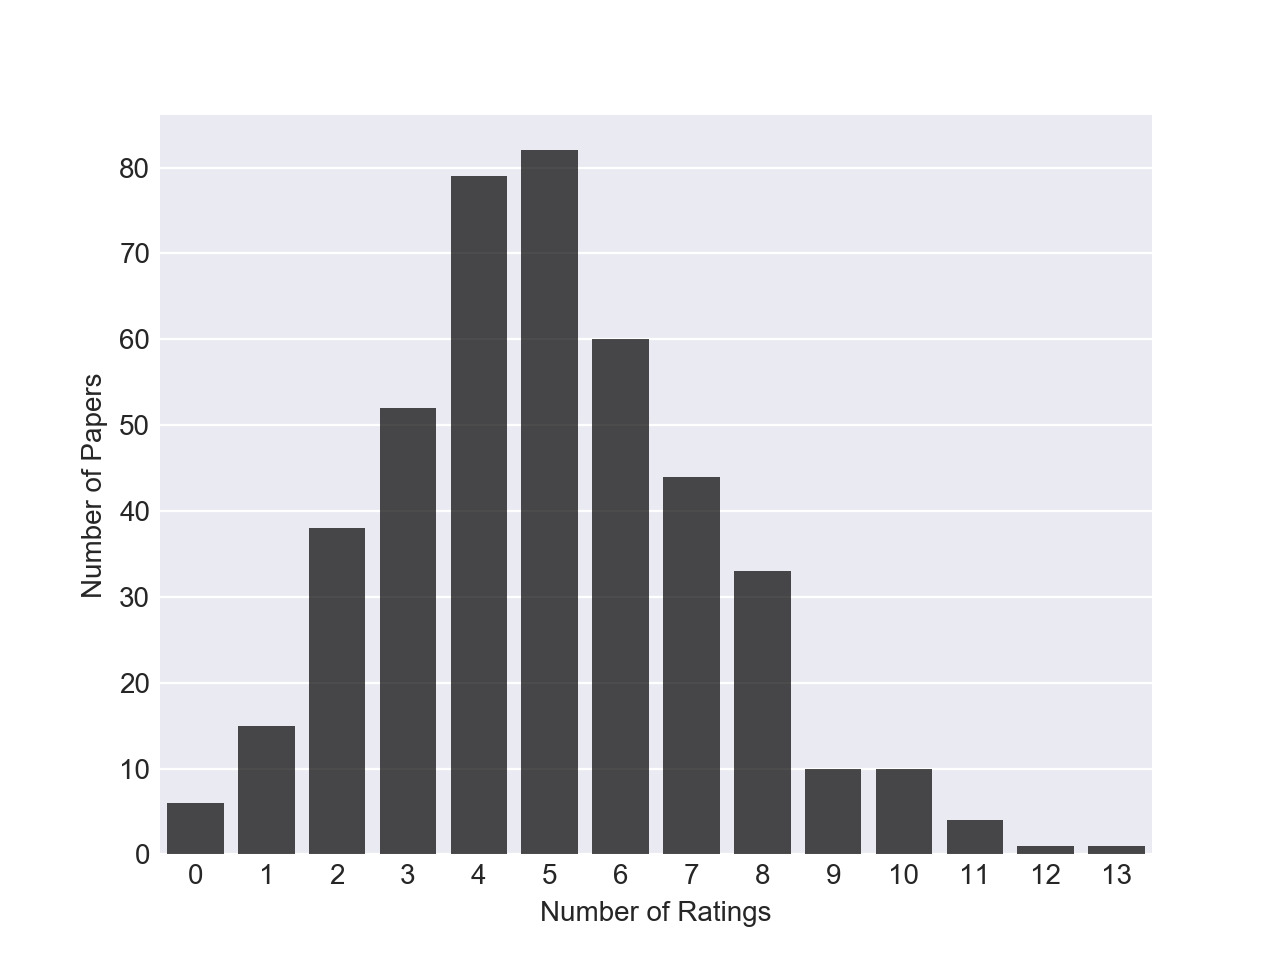

In [89]:
sns.countplot(dfdict['truth_ratings'][['PaperID', 'rating']].merge(
    dfdict['paper_metadata'][['PaperID']], how='outer').groupby('PaperID').count()['rating'], 
              color='k', alpha=0.7)
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Papers')
#save_plot('number_of_ratings_per_paper')

#### Distribution of Ratings over Respondents

<IPython.core.display.Javascript object>


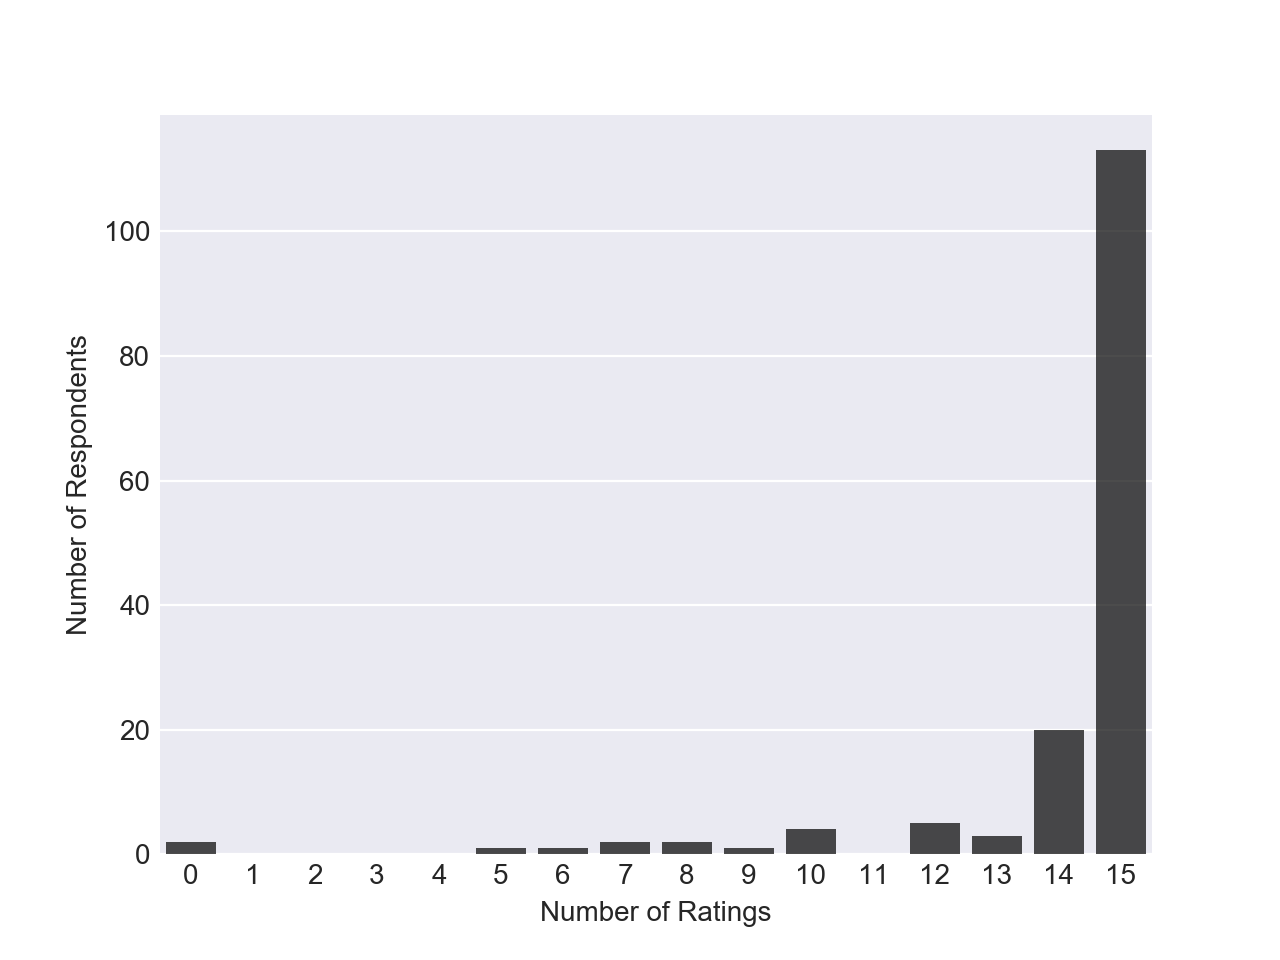

In [137]:
sns.countplot(dfdict['truth_ratings'][['lfdn', 'rating']].merge(
    dfdict['truth_metadata'], how='outer'
).groupby('lfdn').count()['rating'], order=list(range(16)), color='k', alpha=0.7)
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Respondents')
#save_plot('number_of_ratings_per_respondent')

#### Distribution of Ratings over Likert Scale Items

<IPython.core.display.Javascript object>


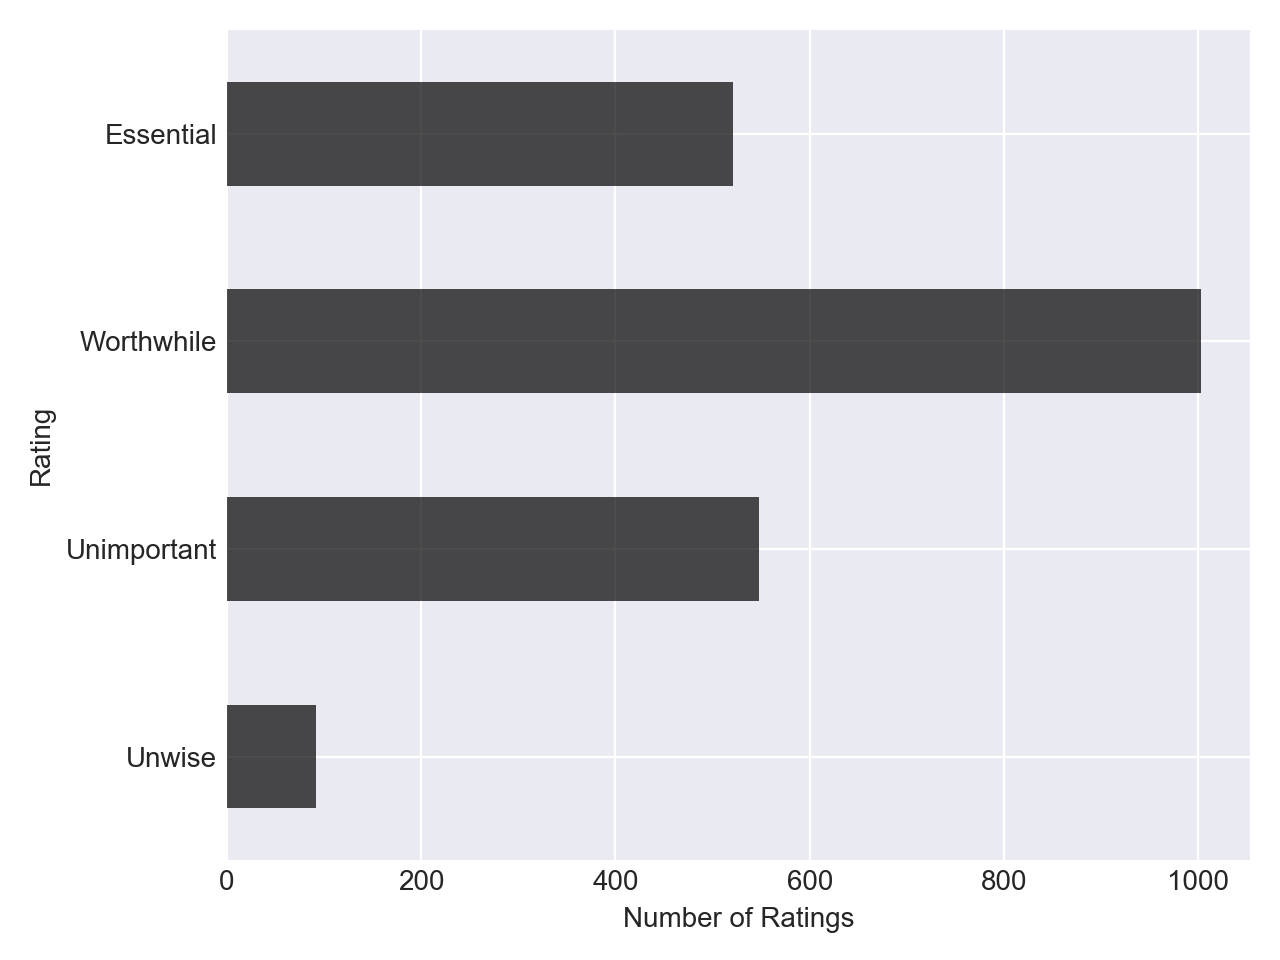

In [202]:
dfdict['truth_ratings'][['lfdn', 'rating']].merge(
    dfdict['truth_metadata'], how='outer'
).groupby('rating').count()[['lfdn']].T[['Unwise', 'Unimportant', 'Worthwhile', 'Essential']].loc['lfdn'].plot.barh(stacked=False, 
                                                                                                        color='k', alpha=0.7)
plt.ylabel('Rating')
plt.xlabel('Number of Ratings')
plt.tight_layout()
#save_plot('number_of_ratings_per_likert_category')

### Section 3.2 - Ratings

### Respondent Characteristics

In [18]:
# this might be of use elsewhere, too
scale = list(reversed(['Essential', 'Worthwhile', 'Unimportant', 'Unwise']))

#### Our Data - Combining the Ratings and the Respondent Metadata

In [9]:
dfdict['truth_metadata'].head(1)

lfdn  lfdn_original                     v_5         v_6 v_11       v_118  \
0     0            106  Other (please specify)  Researcher    4  not quoted   

        v_119   v_120       v_121 v_12         v_14  \
0  not quoted  quoted  not quoted  Yes  Small (1-4)   

                                                v_15         v_16        v_19  \
0  Hybrid / mix of embedded systems and informati...  NotAnswered  Automotive   

   v_124 v_5_6_integrated                                 v_15_16_integrated  \
0  Italy       Researcher  Hybrid / mix of embedded systems and informati...   

   v_11_coded  v_19_coded  
0         4.0  Automotive

In [10]:
dfdict['truth_ratings'].head(1)

lfdn  PaperID      rating
0     2       10  Worthwhile

In [24]:
ratings_with_respondent_meta = dfdict['truth_ratings'].merge(dfdict['truth_metadata'], how='inner')
# we deliberately throw away the two respondents without responses
ratings_with_respondent_meta['rating'] = pd.Categorical(ratings_with_respondent_meta['rating'], scale, ordered=True)
ratings_with_respondent_meta.head(1)

lfdn  PaperID      rating  lfdn_original                     v_5  \
0     2       10  Worthwhile            139  Other (please specify)   

                        v_6 v_11   v_118   v_119   v_120        ...         \
0  Product Management Coach   10  quoted  quoted  quoted        ...          

  v_12           v_14                    v_15  \
0   No  Medium (5-10)  Other (please specify)   

                                v_16  \
0  Customer facing software products   

                                                v_19    v_124  \
0  Wide range (from automotive supplier to insura...  Germany   

  v_5_6_integrated v_15_16_integrated v_11_coded        v_19_coded  
0            Coach  Consumer Software       10.0  Multiple Sectors  

[1 rows x 21 columns]

#### Our General Plotting Function

In [123]:
def plot_df(df, var, varname, absolute=True):
    data = df[['lfdn', var, 'rating']
                                ].groupby([var, 'rating']).count(
    ).fillna(0).astype(int).unstack().sort_index(ascending=False)
    if absolute:
        data.plot.barh(stacked=True, cmap='bwr', alpha=0.7, figsize=(10,6)) 
    else:
        data.div(data.sum(axis=1).values, axis=0).plot.barh(stacked=True, cmap='bwr', alpha=0.7, figsize=(10,6))
        plt.xlim((0,1))
        plt.xticks(np.arange(0,1.01,0.1))
    plt.xlabel('Number of Ratings' if absolute else 'Percentage of Ratings')
    plt.ylabel(varname)
    plt.legend([])
    plt.tight_layout()

#### Respondent Countries

In [126]:
ratings_with_respondent_meta[['lfdn', 'v_124', 'rating']
                                ].groupby(['v_124', 'rating']).count(
    ).fillna(0).astype(int).unstack()

lfdn                                 
rating                        Unwise Unimportant Worthwhile Essential
v_124                                                                
-- Please make a Selection --      3           5          7         0
Australia                          1           6         10        13
Austria                            0           7          5         3
Belarus                            3           3          3         6
Brazil                            10          16         80        35
Canada                             6          32         57        25
Chile                              0          11         15         4
China                              5          20         67        54
Denmark                            1          18          9         2
Ecuador                            0           8          6         1
France                             1          15         20         9
Germany                           22         147        251       126
Greece                             1           9         14         6
India                              0           2         33        19
Italy                              0           1          7         5
Japan                              1           2          9         3
Kuwait                             2           2          4         6
Luxembourg                         3           4          6         2
Malaysia                           1           5          4         5
Mexico                             0           1          6         8
Netherlands                        2          19         32         6
New Zealand                        0           2          8         5
Norway                             0           8         17         5
Portugal                           0           3         12        13
Romania                            1           7          4         3
South Africa                       2           7         12         9
Spain                             10          31         45        27
Sweden                             7          45         55        19
Switzerland                        4          42         54        29
United Kingdom                     2          17         44        22
United States                      1          48        102        49
Uruguay                            3           5          5         2

<IPython.core.display.Javascript object>


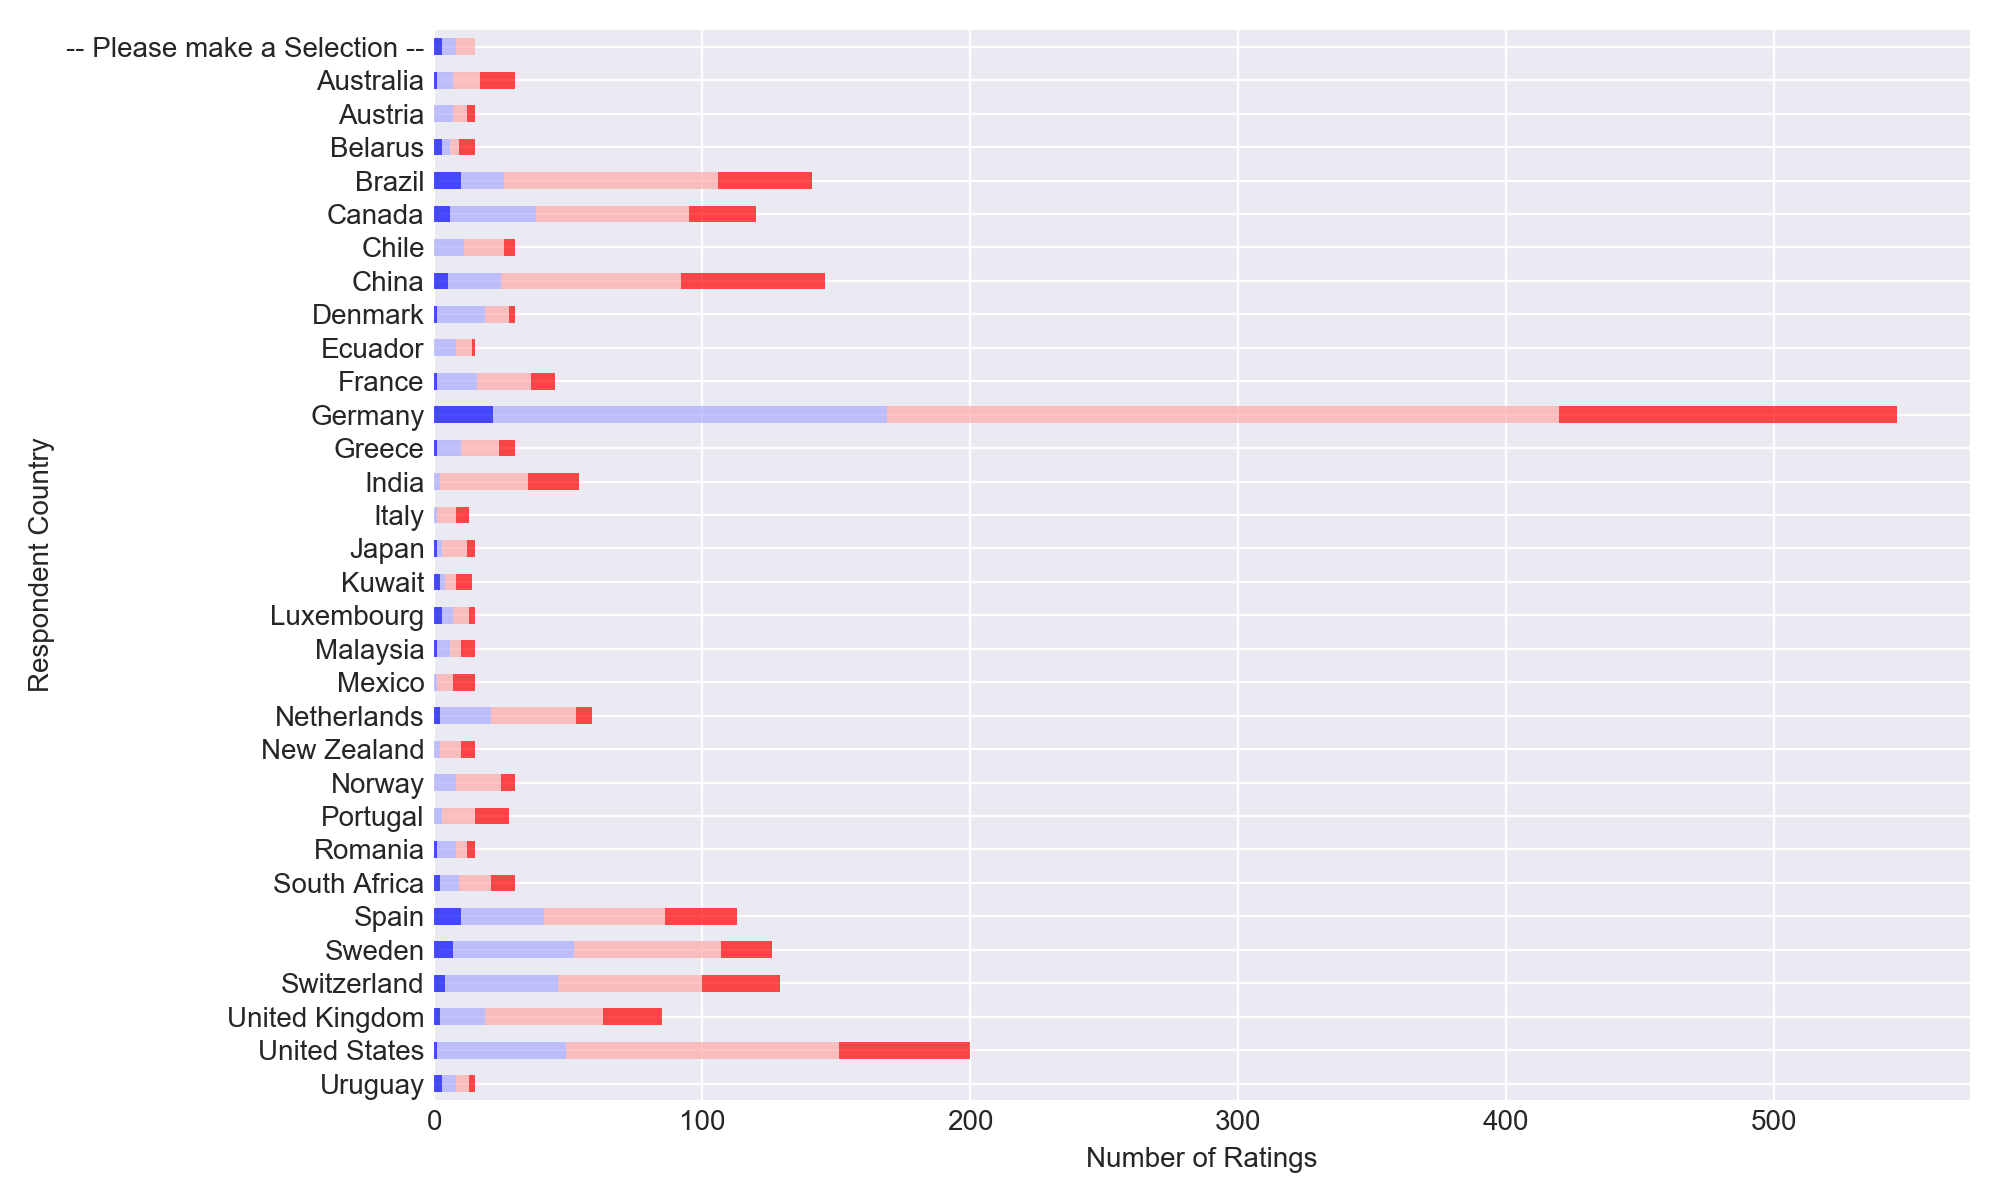

In [127]:
plot_df(ratings_with_respondent_meta, 'v_124', 'Respondent Country', absolute=True)
#save_plot('ratings_by_country_absolute')

In [80]:
ratings_with_respondent_meta[['lfdn', 'v_124', 'rating']
                                ].groupby(['v_124', 'rating']).count(
    ).fillna(0).astype(int).unstack().div(ratings_with_respondent_meta[['lfdn', 'v_124', 'rating']
                                ].groupby(['v_124', 'rating']).count(
    ).fillna(0).astype(int).unstack().sum(axis=1).values, axis=0)

lfdn                                 
rating                           Unwise Unimportant Worthwhile Essential
v_124                                                                   
-- Please make a Selection --  0.200000    0.333333   0.466667  0.000000
Australia                      0.033333    0.200000   0.333333  0.433333
Austria                        0.000000    0.466667   0.333333  0.200000
Belarus                        0.200000    0.200000   0.200000  0.400000
Brazil                         0.070922    0.113475   0.567376  0.248227
Canada                         0.050000    0.266667   0.475000  0.208333
Chile                          0.000000    0.366667   0.500000  0.133333
China                          0.034247    0.136986   0.458904  0.369863
Denmark                        0.033333    0.600000   0.300000  0.066667
Ecuador                        0.000000    0.533333   0.400000  0.066667
France                         0.022222    0.333333   0.444444  0.200000
Germany                        0.040293    0.269231   0.459707  0.230769
Greece                         0.033333    0.300000   0.466667  0.200000
India                          0.000000    0.037037   0.611111  0.351852
Italy                          0.000000    0.076923   0.538462  0.384615
Japan                          0.066667    0.133333   0.600000  0.200000
Kuwait                         0.142857    0.142857   0.285714  0.428571
Luxembourg                     0.200000    0.266667   0.400000  0.133333
Malaysia                       0.066667    0.333333   0.266667  0.333333
Mexico                         0.000000    0.066667   0.400000  0.533333
Netherlands                    0.033898    0.322034   0.542373  0.101695
New Zealand                    0.000000    0.133333   0.533333  0.333333
Norway                         0.000000    0.266667   0.566667  0.166667
Portugal                       0.000000    0.107143   0.428571  0.464286
Romania                        0.066667    0.466667   0.266667  0.200000
South Africa                   0.066667    0.233333   0.400000  0.300000
Spain                          0.088496    0.274336   0.398230  0.238938
Sweden                         0.055556    0.357143   0.436508  0.150794
Switzerland                    0.031008    0.325581   0.418605  0.224806
United Kingdom                 0.023529    0.200000   0.517647  0.258824
United States                  0.005000    0.240000   0.510000  0.245000
Uruguay                        0.200000    0.333333   0.333333  0.133333

<IPython.core.display.Javascript object>


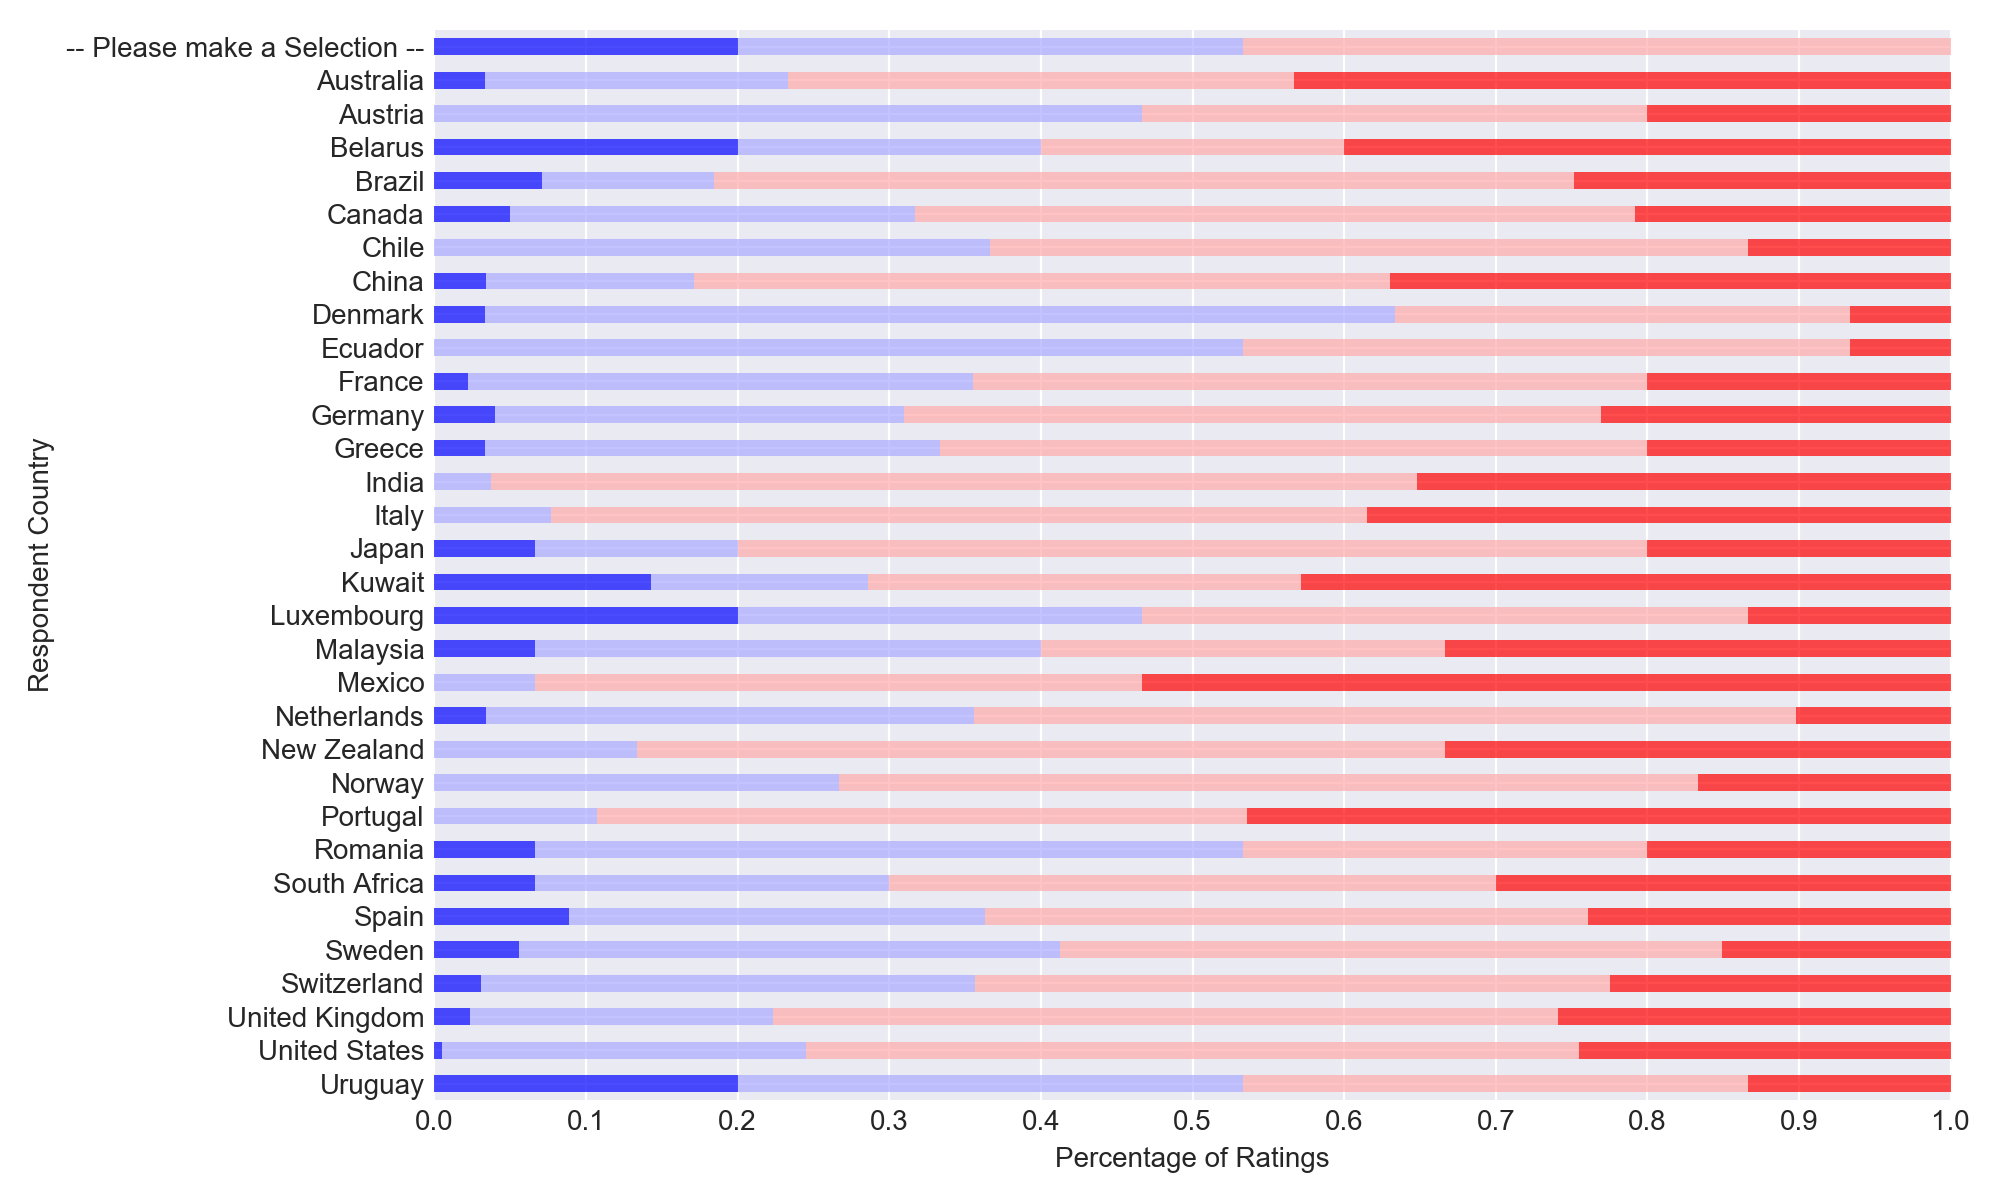

In [128]:
plot_df(ratings_with_respondent_meta, 'v_124', 'Respondent Country', absolute=False)
#save_plot('ratings_by_country_relative')

### Paper Characteristics

#### Preparations

In [6]:
def split_tags(old_df, level_4=False):
    df = pd.DataFrame(old_df, copy=True)
    levels = [x.split(':') for x in df.Tag]
    df['level_1'] = [x[0] for x in levels]
    df['level_2'] = [x[1] for x in levels]
    df['level_3'] = [x[2].split('_')[0] for x in levels]
    if level_4:
        df['level_4'] = [x[2].split('_')[1] if '_' in x[2] else '' for x in levels]
    return df

In [7]:
all_levels = [f'level_{x}' for x in range(1,5)]
all_ratings = ['Essential', 'Worthwhile', 'Unimportant', 'Unwise']
all_ratings_sorted = [f'{idx}_{rating}' for idx, rating in enumerate(all_ratings)]

Overview of the paper tags - the same as in chapter 2

In [8]:
papertags_method = split_tags(dfdict['papertags_how_withwhom_final'], level_4=False)
papertags_content = split_tags(dfdict['papertags_what_final'], level_4=True)

In [9]:
print(papertags_method.shape, papertags_content.shape)

(501, 6) (940, 7)


In [13]:
#papertags_method.groupby(all_levels).count()

In [12]:
#papertags_content.groupby(all_levels).count()[['Tag']]

In [10]:
def ratings_with_papertags(ratingsdf, tagdf, all_levels, all_ratings, all_ratings_sorted, rel=False):
    ratingsdf = ratingsdf.replace(all_ratings,all_ratings_sorted)
    df = ratingsdf.merge(tagdf).drop(['PaperSummary', 'Tag', 'lfdn'], axis=1
                                    ).groupby(all_levels + ['rating']).count(
    ).rename({'PaperID':'count'}, axis=1).unstack().fillna(0)
    df['pos'] = df[('count', all_ratings_sorted[0])] + df[('count', all_ratings_sorted[1])]
    df['neg'] = df[('count', all_ratings_sorted[2])] + df[('count', all_ratings_sorted[3])]
    df['total'] = df[('pos')] + df[('neg')]
    if rel:
        for col in df.columns:
            df[col] = df[col] / df['total']
    return df

In [ ]:
def plot_tag_ratings(df, mode='abs'):
    df.drop(['total','pos','neg'], axis=1).plot.barh(stacked=True, cmap='bwr', figsize=(9,6), alpha=0.5)
    plt.legend([])
    plt.ylabel('')
    if mode == 'abs':
        maxval = df['total'].max()
        upperbound = (divmod(maxval,100)[0]+1)*100
        plt.xlim((0,upperbound))
        plt.xticks(np.arange(0,upperbound+1,100))
    elif mode == 'rel':
        plt.xlim((0,1))
        plt.xticks(np.arange(0,1.01,0.1))
    plt.tight_layout()
    

### Paper Methodology

#### How?

In [13]:
ratings_with_papertags(dfdict['truth_ratings'], 
                       papertags_method, all_levels[:-1], all_ratings, all_ratings_sorted
                      ).loc['how'].sort_values(
    [('pos'), ('count','0_Essential'), ('count','1_Worthwhile')], na_position='first', ascending=False).astype(int)

count                                      \
rating                    0_Essential 1_Worthwhile 2_Unimportant 3_Unwise   
level_2     level_3                                                         
engineering methodology           244          403           200       38   
science     observation           102          185            90       14   
            interrogation          70          103            53        7   
perspective experience             30           89            56        7   
science     intervention           19           96            69       13   
engineering technology             28           70            49        7   
perspective review                 12           30            23        3   
            opinion                 8           22            14        1   
engineering reference              10           11             4        1   
perspective philosophy              1            3             1        1   

                           pos  neg total  
rating                                     
level_2     level_3                        
engineering methodology    647  238   885  
science     observation    287  104   391  
            interrogation  173   60   233  
perspective experience     119   63   182  
science     intervention   115   82   197  
engineering technology      98   56   154  
perspective review          42   26    68  
            opinion         30   15    45  
engineering reference       21    5    26  
perspective philosophy       4    2     6

<IPython.core.display.Javascript object>


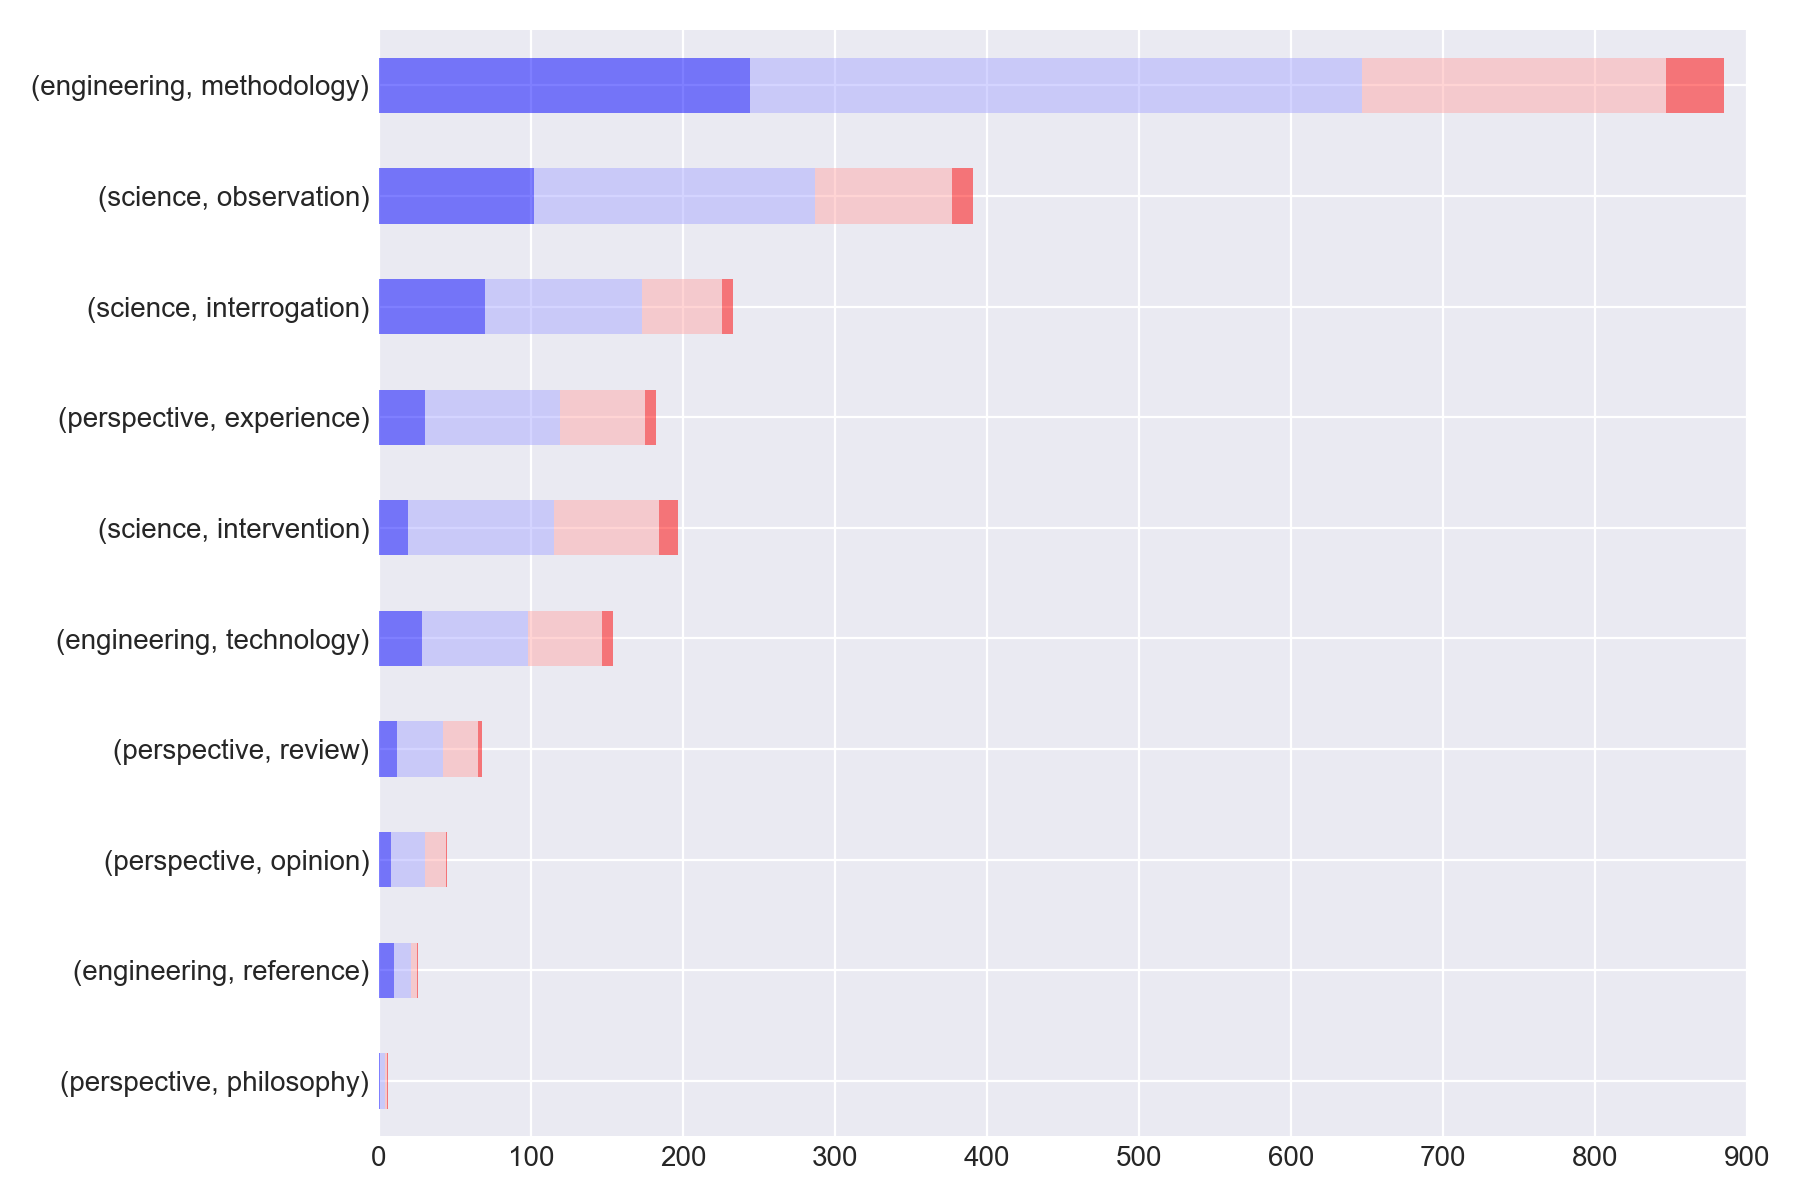

In [37]:
plot_tag_ratings(ratings_with_papertags(dfdict['truth_ratings'], 
                       papertags_method, all_levels[:-1], all_ratings, all_ratings_sorted
                      ).loc['how'].sort_values([('pos'), ('count','0_Essential'), ('count','1_Worthwhile')], 
                                               na_position='first'), mode='abs')
save_plot('papertags_method_how_absolute')

In [14]:
ratings_with_papertags(dfdict['truth_ratings'], 
                       papertags_method, all_levels[:-1], all_ratings, all_ratings_sorted, rel=True
                      ).loc['how'].sort_values(
    [('pos'), ('count','0_Essential'), ('count','1_Worthwhile')], ascending=False, na_position='last')

count                                       \
rating                    0_Essential 1_Worthwhile 2_Unimportant  3_Unwise   
level_2     level_3                                                          
engineering reference        0.384615     0.423077      0.153846  0.038462   
science     interrogation    0.300429     0.442060      0.227468  0.030043   
            observation      0.260870     0.473146      0.230179  0.035806   
engineering methodology      0.275706     0.455367      0.225989  0.042938   
perspective opinion          0.177778     0.488889      0.311111  0.022222   
            philosophy       0.166667     0.500000      0.166667  0.166667   
            experience       0.164835     0.489011      0.307692  0.038462   
engineering technology       0.181818     0.454545      0.318182  0.045455   
perspective review           0.176471     0.441176      0.338235  0.044118   
science     intervention     0.096447     0.487310      0.350254  0.065990   

                                pos       neg total  
rating                                               
level_2     level_3                                  
engineering reference      0.807692  0.192308   1.0  
science     interrogation  0.742489  0.257511   1.0  
            observation    0.734015  0.265985   1.0  
engineering methodology    0.731073  0.268927   1.0  
perspective opinion        0.666667  0.333333   1.0  
            philosophy     0.666667  0.333333   1.0  
            experience     0.653846  0.346154   1.0  
engineering technology     0.636364  0.363636   1.0  
perspective review         0.617647  0.382353   1.0  
science     intervention   0.583756  0.416244   1.0

<IPython.core.display.Javascript object>


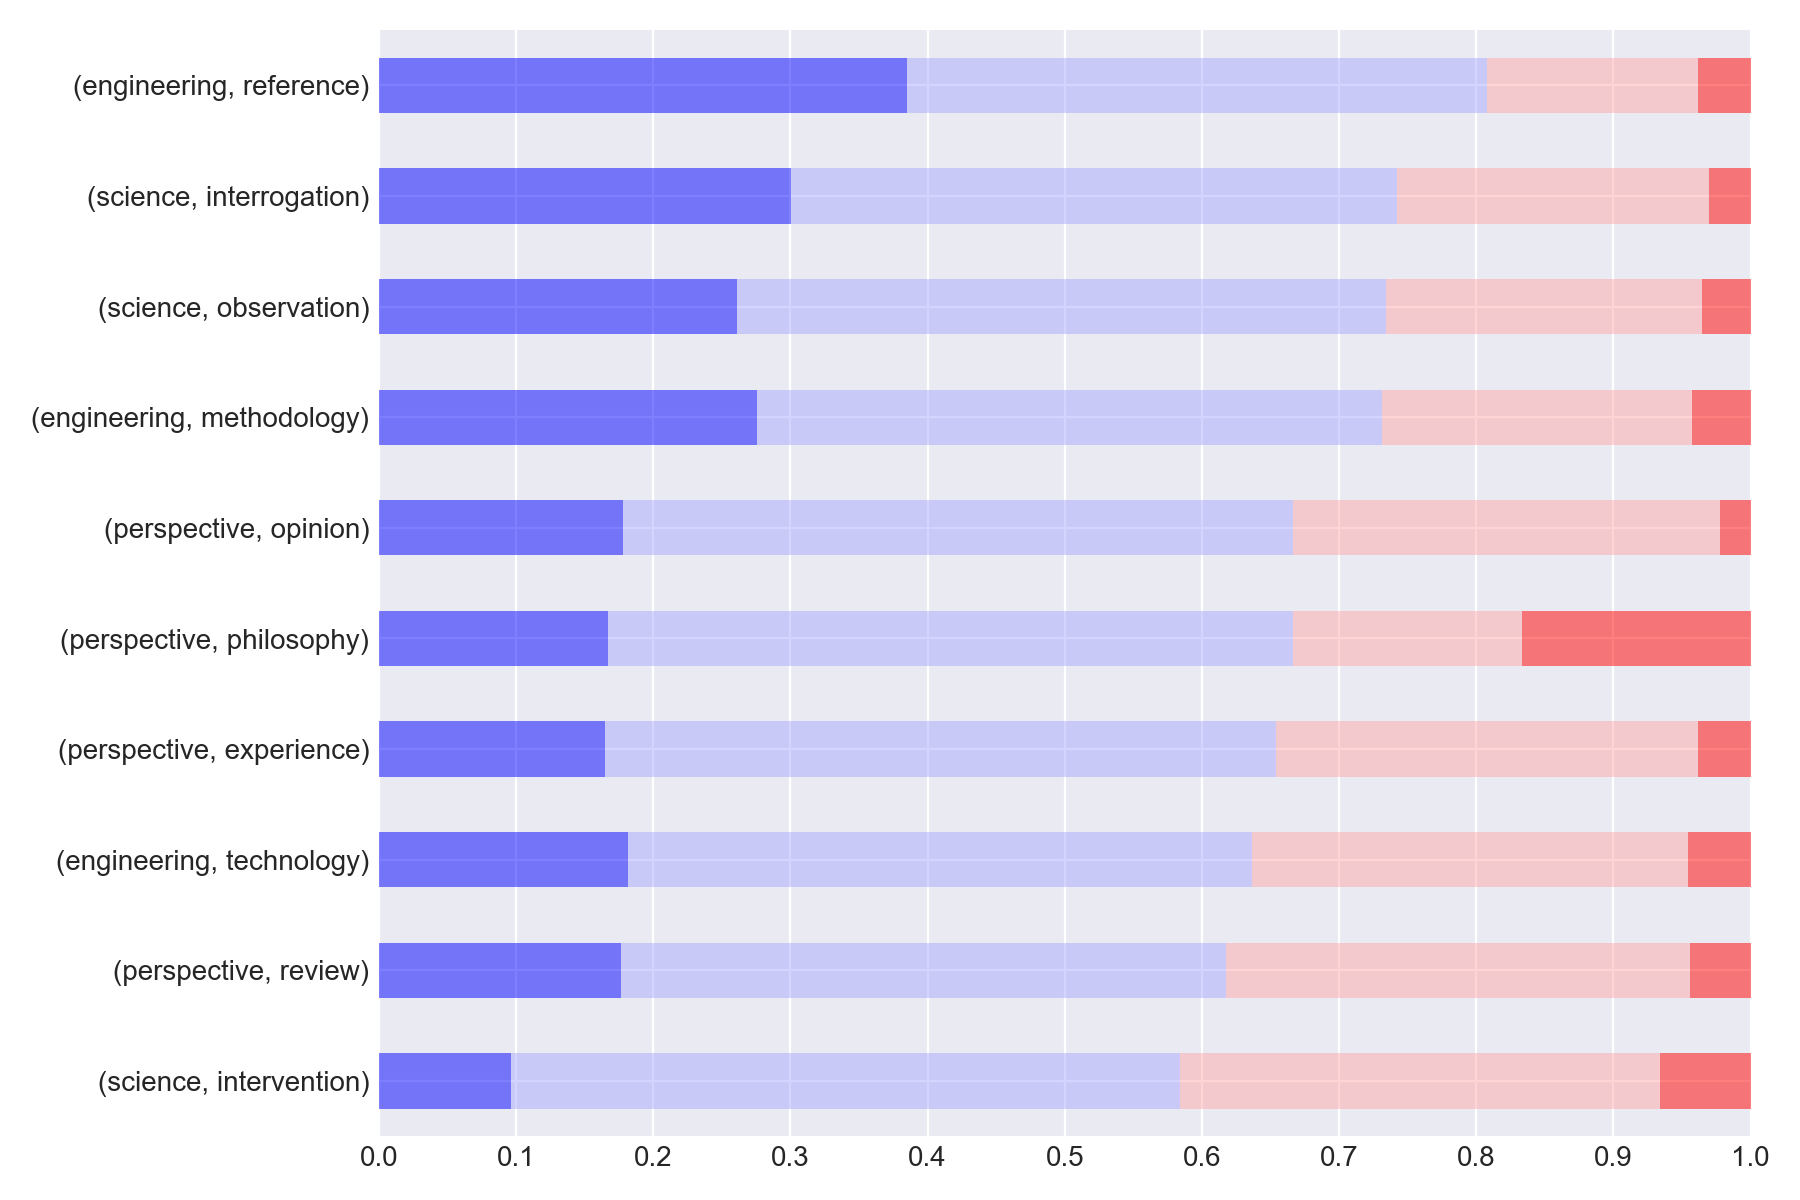

In [39]:
plot_tag_ratings(ratings_with_papertags(dfdict['truth_ratings'], 
                       papertags_method, all_levels[:-1], all_ratings, all_ratings_sorted, rel=True
                      ).loc['how'].sort_values([('pos'), ('count','0_Essential'), ('count','1_Worthwhile')], 
                                               na_position='first'), mode='rel')
save_plot('papertags_method_how_relative')

In [41]:
ratings_with_papertags(dfdict['truth_ratings'], 
                       papertags_method, all_levels[:-1], all_ratings, all_ratings_sorted
                      ).loc['how'].astype(int)

count                                      \
rating                    0_Essential 1_Worthwhile 2_Unimportant 3_Unwise   
level_2     level_3                                                         
engineering methodology           244          403           200       38   
            reference              10           11             4        1   
            technology             28           70            49        7   
perspective experience             30           89            56        7   
            opinion                 8           22            14        1   
            philosophy              1            3             1        1   
            review                 12           30            23        3   
science     interrogation          70          103            53        7   
            intervention           19           96            69       13   
            observation           102          185            90       14   

                           pos  neg total  
rating                                     
level_2     level_3                        
engineering methodology    647  238   885  
            reference       21    5    26  
            technology      98   56   154  
perspective experience     119   63   182  
            opinion         30   15    45  
            philosophy       4    2     6  
            review          42   26    68  
science     interrogation  173   60   233  
            intervention   115   82   197  
            observation    287  104   391

In [40]:
ratings_with_papertags(dfdict['truth_ratings'], 
                       papertags_method, all_levels[:-1], all_ratings, all_ratings_sorted, rel=True
                      ).loc['how'].apply(np.round, decimals=2)

count                                      \
rating                    0_Essential 1_Worthwhile 2_Unimportant 3_Unwise   
level_2     level_3                                                         
engineering methodology          0.28         0.46          0.23     0.04   
            reference            0.38         0.42          0.15     0.04   
            technology           0.18         0.45          0.32     0.05   
perspective experience           0.16         0.49          0.31     0.04   
            opinion              0.18         0.49          0.31     0.02   
            philosophy           0.17         0.50          0.17     0.17   
            review               0.18         0.44          0.34     0.04   
science     interrogation        0.30         0.44          0.23     0.03   
            intervention         0.10         0.49          0.35     0.07   
            observation          0.26         0.47          0.23     0.04   

                            pos   neg total  
rating                                       
level_2     level_3                          
engineering methodology    0.73  0.27   1.0  
            reference      0.81  0.19   1.0  
            technology     0.64  0.36   1.0  
perspective experience     0.65  0.35   1.0  
            opinion        0.67  0.33   1.0  
            philosophy     0.67  0.33   1.0  
            review         0.62  0.38   1.0  
science     interrogation  0.74  0.26   1.0  
            intervention   0.58  0.42   1.0  
            observation    0.73  0.27   1.0

#### With whom?

In [42]:
ratings_with_papertags(dfdict['truth_ratings'], 
                       papertags_method, all_levels[:-1], all_ratings, all_ratings_sorted, rel=False
                      ).loc['withwhom'].astype(int)

count                                      \
rating                      0_Essential 1_Worthwhile 2_Unimportant 3_Unwise   
level_2       level_3                                                         
laypeople     others                  0            0             1        0   
              students               13           75            57        9   
professionals academics               1            4             2        3   
              practitioners          53           76            32        2   

                             pos neg total  
rating                                      
level_2       level_3                       
laypeople     others           0   1     1  
              students        88  66   154  
professionals academics        5   5    10  
              practitioners  129  34   163

<IPython.core.display.Javascript object>


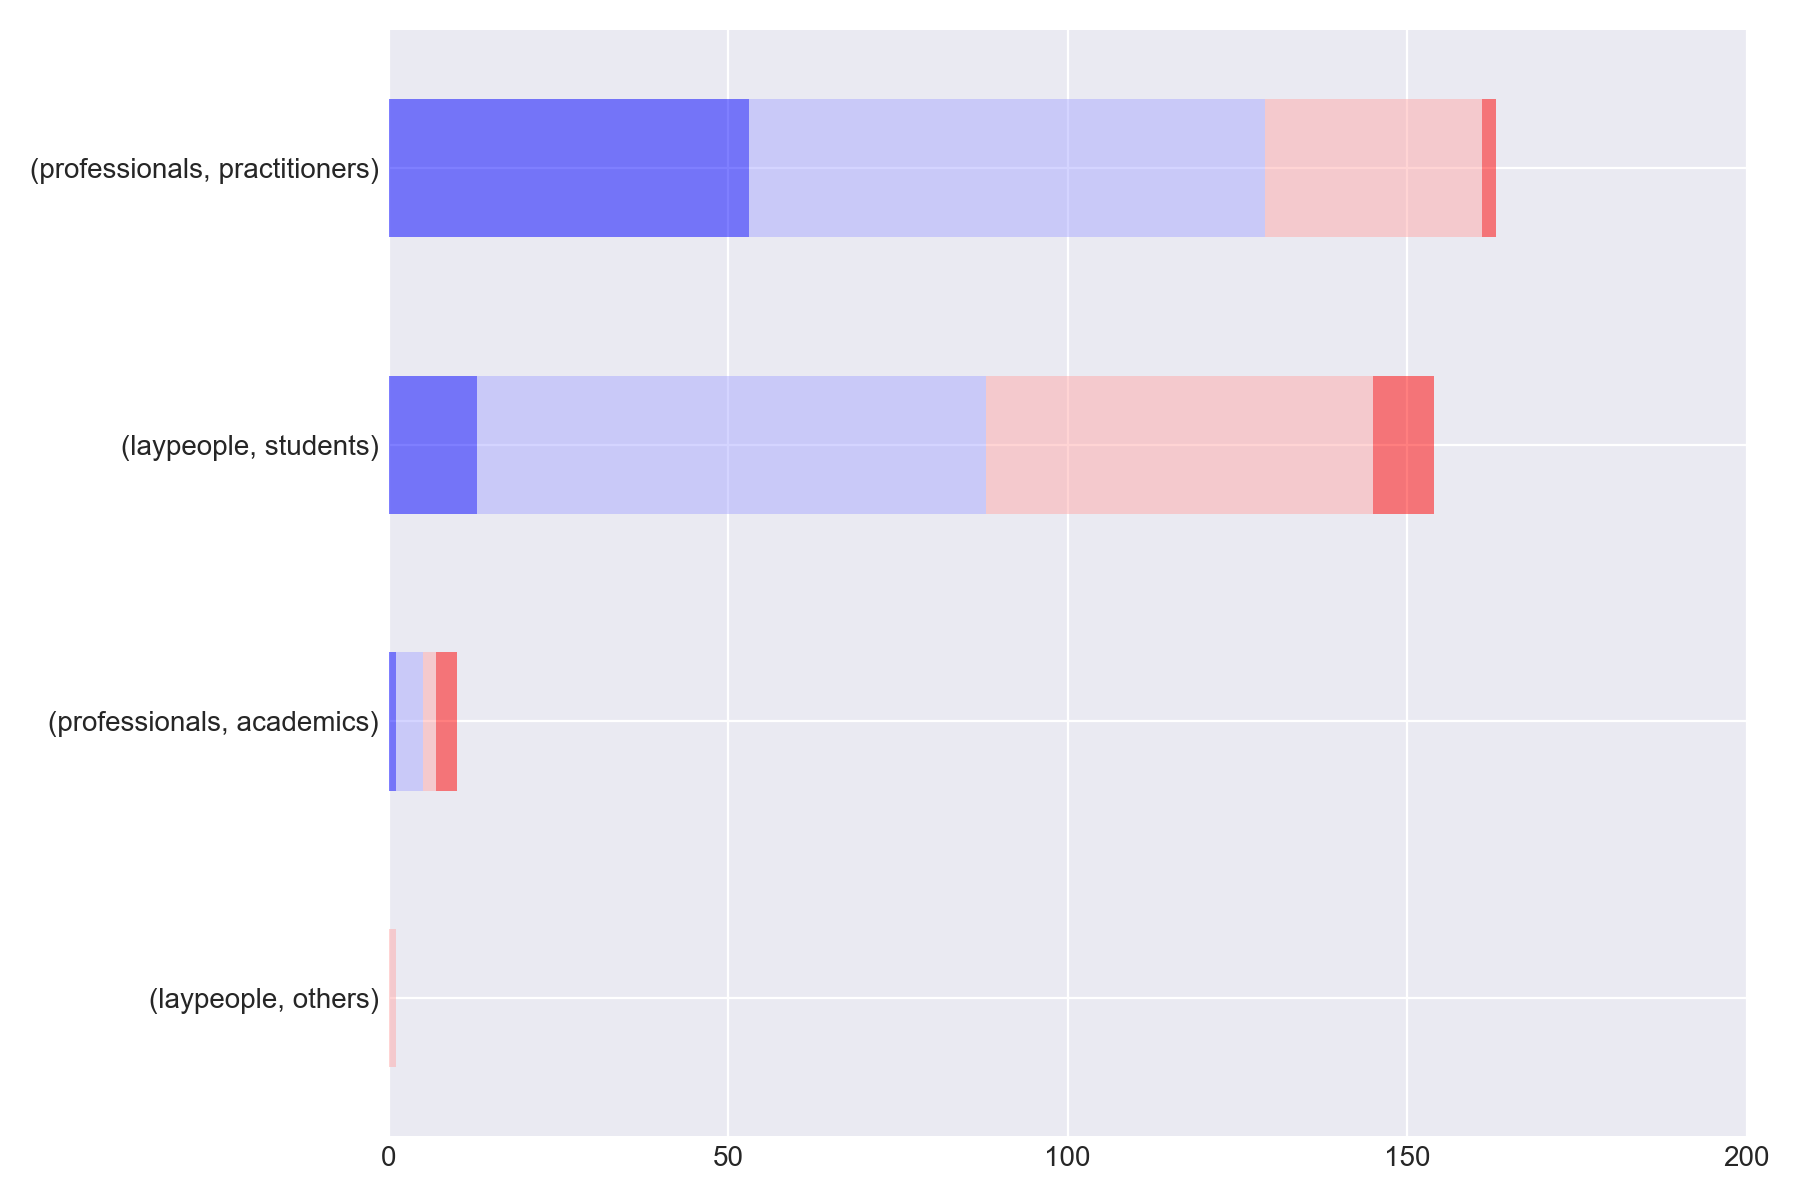

In [43]:
plot_tag_ratings(ratings_with_papertags(dfdict['truth_ratings'], 
                       papertags_method, all_levels[:-1], all_ratings, all_ratings_sorted, rel=False
                      ).loc['withwhom'].sort_values([('pos'), ('count','0_Essential'), ('count','1_Worthwhile')], 
                                               na_position='first'), mode='abs')
plt.xticks(range(0,201,50))
save_plot('papertags_method_withwhom_absolute')

In [44]:
ratings_with_papertags(dfdict['truth_ratings'], 
                       papertags_method, all_levels[:-1], all_ratings, all_ratings_sorted, rel=True
                      ).loc['withwhom'].apply(np.round, decimals=2)

count                                      \
rating                      0_Essential 1_Worthwhile 2_Unimportant 3_Unwise   
level_2       level_3                                                         
laypeople     others               0.00         0.00          1.00     0.00   
              students             0.08         0.49          0.37     0.06   
professionals academics            0.10         0.40          0.20     0.30   
              practitioners        0.33         0.47          0.20     0.01   

                              pos   neg total  
rating                                         
level_2       level_3                          
laypeople     others         0.00  1.00   1.0  
              students       0.57  0.43   1.0  
professionals academics      0.50  0.50   1.0  
              practitioners  0.79  0.21   1.0

<IPython.core.display.Javascript object>


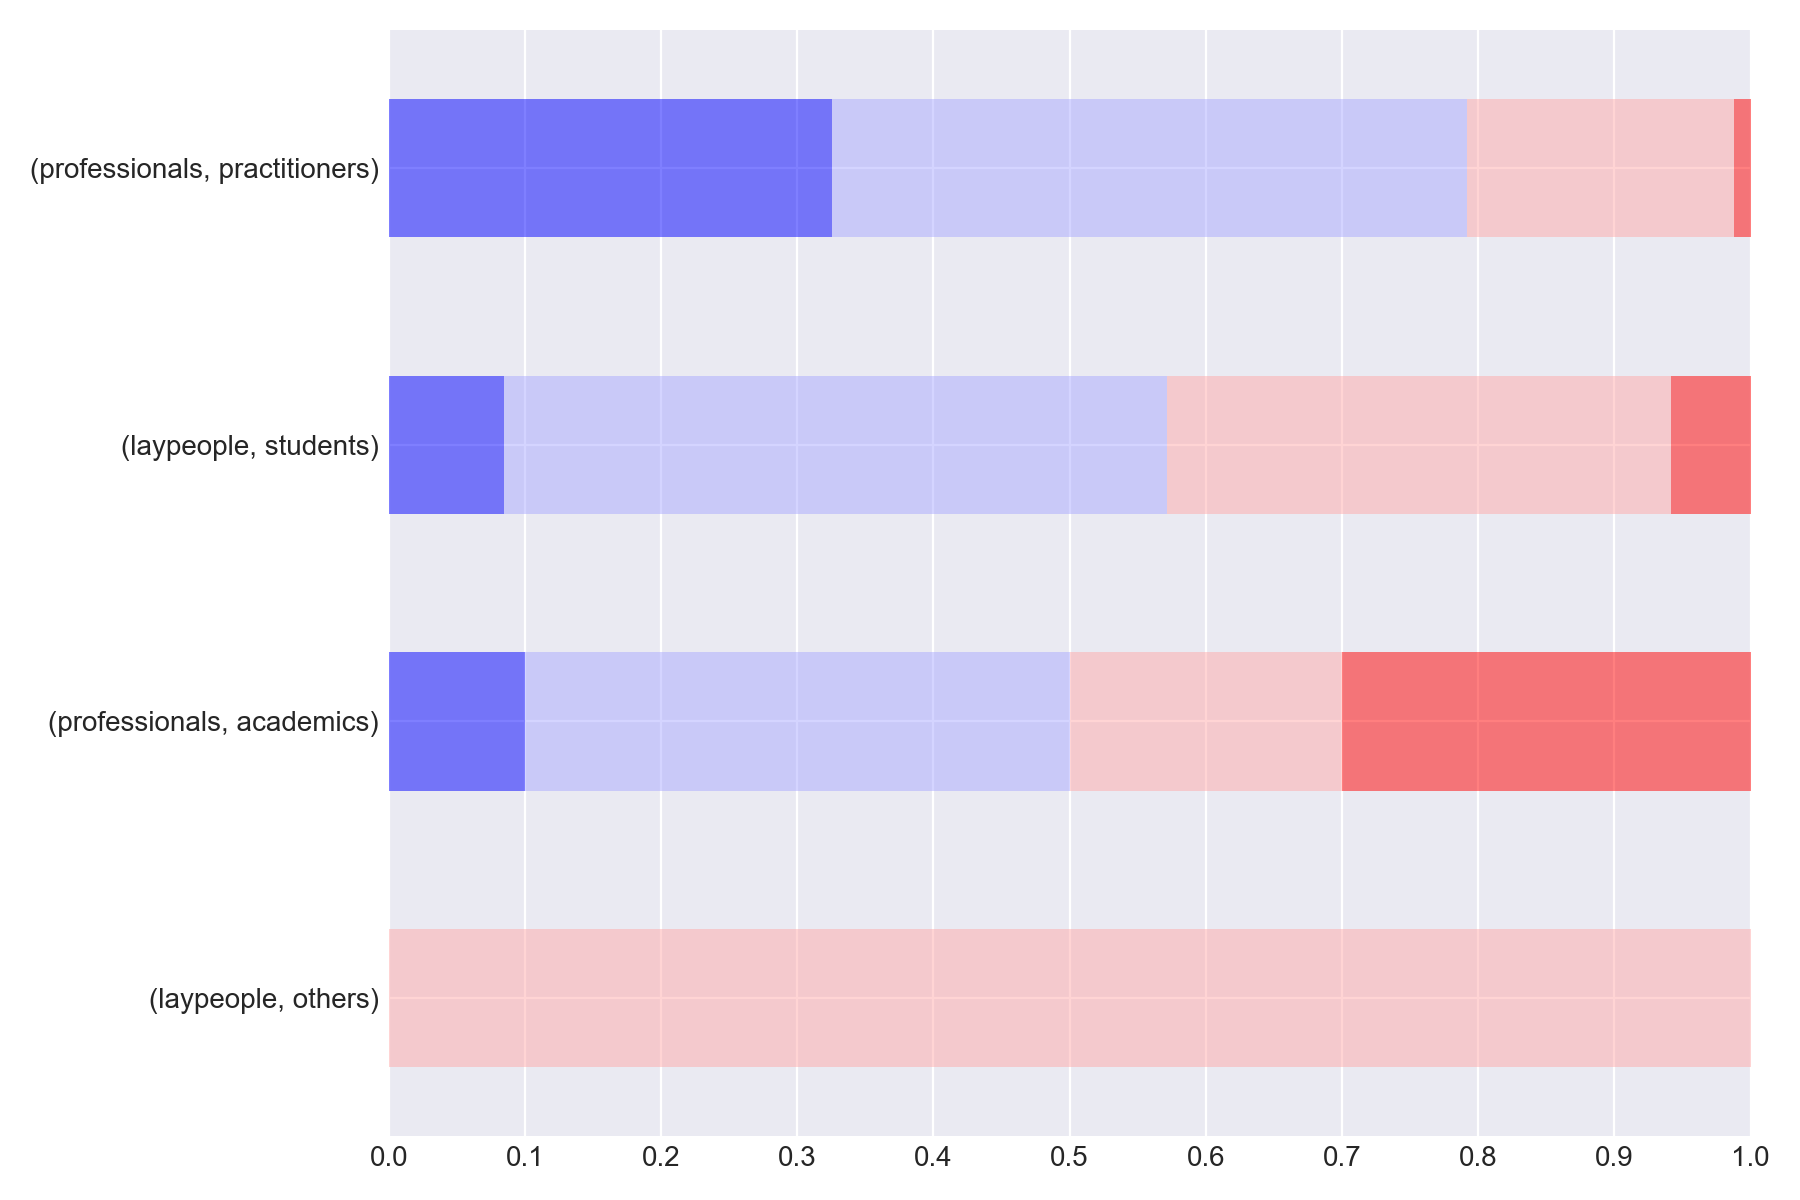

In [50]:
plot_tag_ratings(ratings_with_papertags(dfdict['truth_ratings'], 
                       papertags_method, all_levels[:-1], all_ratings, all_ratings_sorted, rel=True
                      ).loc['withwhom'].sort_values([('pos'), ('count','0_Essential'), ('count','1_Worthwhile')], 
                                               na_position='first'), mode='rel')
save_plot('papertags_method_withwhom_relative')

### Paper Content

In [48]:
ratings_with_papertags(dfdict['truth_ratings'], 
                       papertags_content, all_levels, all_ratings, all_ratings_sorted, rel=False
                      ).loc['what'].astype(int)

count               \
rating                                          0_Essential 1_Worthwhile   
level_2       level_3         level_4                                      
challenge     content         all                         8           17   
                              completeness               21           46   
                              consistency                20           39   
                              feasibility                 2            1   
                              traceability               61           99   
                              unambiguousness            22           35   
                              understandability          17           38   
              context         regulation                 27           46   
                              uncertainty                38           73   
              failure                                    11           23   
              people          collaboration              19           33   
                              communication              38           53   
                              skills                     14           58   
                              subjectivity               14           27   
              problem                                    13           25   
              process         automation                 49          110   
                              deciding                   24           49   
                              formalization               9           14   
                              improving                  36           82   
                              prioritization             15           46   
                              standardization            26           58   
                              visualization              12           27   
documentation artifacts                                  20           31   
              businessmodels                              1            3   
              diagrams                                    5           16   
              featuremodels                              12           30   
              goalmodels                                  1           16   
              naturallanguage                            53          118   
              prototypes                                  4            2   
              statemachines                               1            1   
...                                                     ...          ...   
domain        sector          public                      3           13   
                              subsea                      1            0   
                              supplier                    6            3   
              systemclass     adaptive                   13           16   
                              bi                          1            2   
                              complex                     3            4   
                              embedded                    2            3   
                              safetycritical             10           16   
general       framework                                   3            6   
              research                                    7           13   
information   architecture                               10           22   
              functional                                 10           30   
              goals                                      10           42   
              quality         all                        24           43   
                              performance                 3           18   
                              reliability                 3            4   
                              safety                      9           14   
                              security                   39           61   
                              sustainability              3            8   
                          

In [68]:
ratings_with_papertags(dfdict['truth_ratings'], 
                       papertags_content, all_levels, all_ratings, all_ratings_sorted, rel=False
                      ).loc['what'].loc['documentation']

count                                      \
rating                  0_Essential 1_Worthwhile 2_Unimportant 3_Unwise   
level_3         level_4                                                   
artifacts                      20.0         31.0          13.0      0.0   
businessmodels                  1.0          3.0           4.0      0.0   
diagrams                        5.0         16.0           9.0      1.0   
featuremodels                  12.0         30.0          14.0      1.0   
goalmodels                      1.0         16.0          11.0      4.0   
naturallanguage                53.0        118.0          68.0     12.0   
prototypes                      4.0          2.0           0.0      0.0   
statemachines                   1.0          1.0           2.0      0.0   
usecases                       12.0         25.0           6.0      6.0   
userstories                     6.0          6.0           6.0      0.0   

                           pos   neg  total  
rating                                       
level_3         level_4                      
artifacts                 51.0  13.0   64.0  
businessmodels             4.0   4.0    8.0  
diagrams                  21.0  10.0   31.0  
featuremodels             42.0  15.0   57.0  
goalmodels                17.0  15.0   32.0  
naturallanguage          171.0  80.0  251.0  
prototypes                 6.0   0.0    6.0  
statemachines              2.0   2.0    4.0  
usecases                  37.0  12.0   49.0  
userstories               12.0   6.0   18.0

<IPython.core.display.Javascript object>


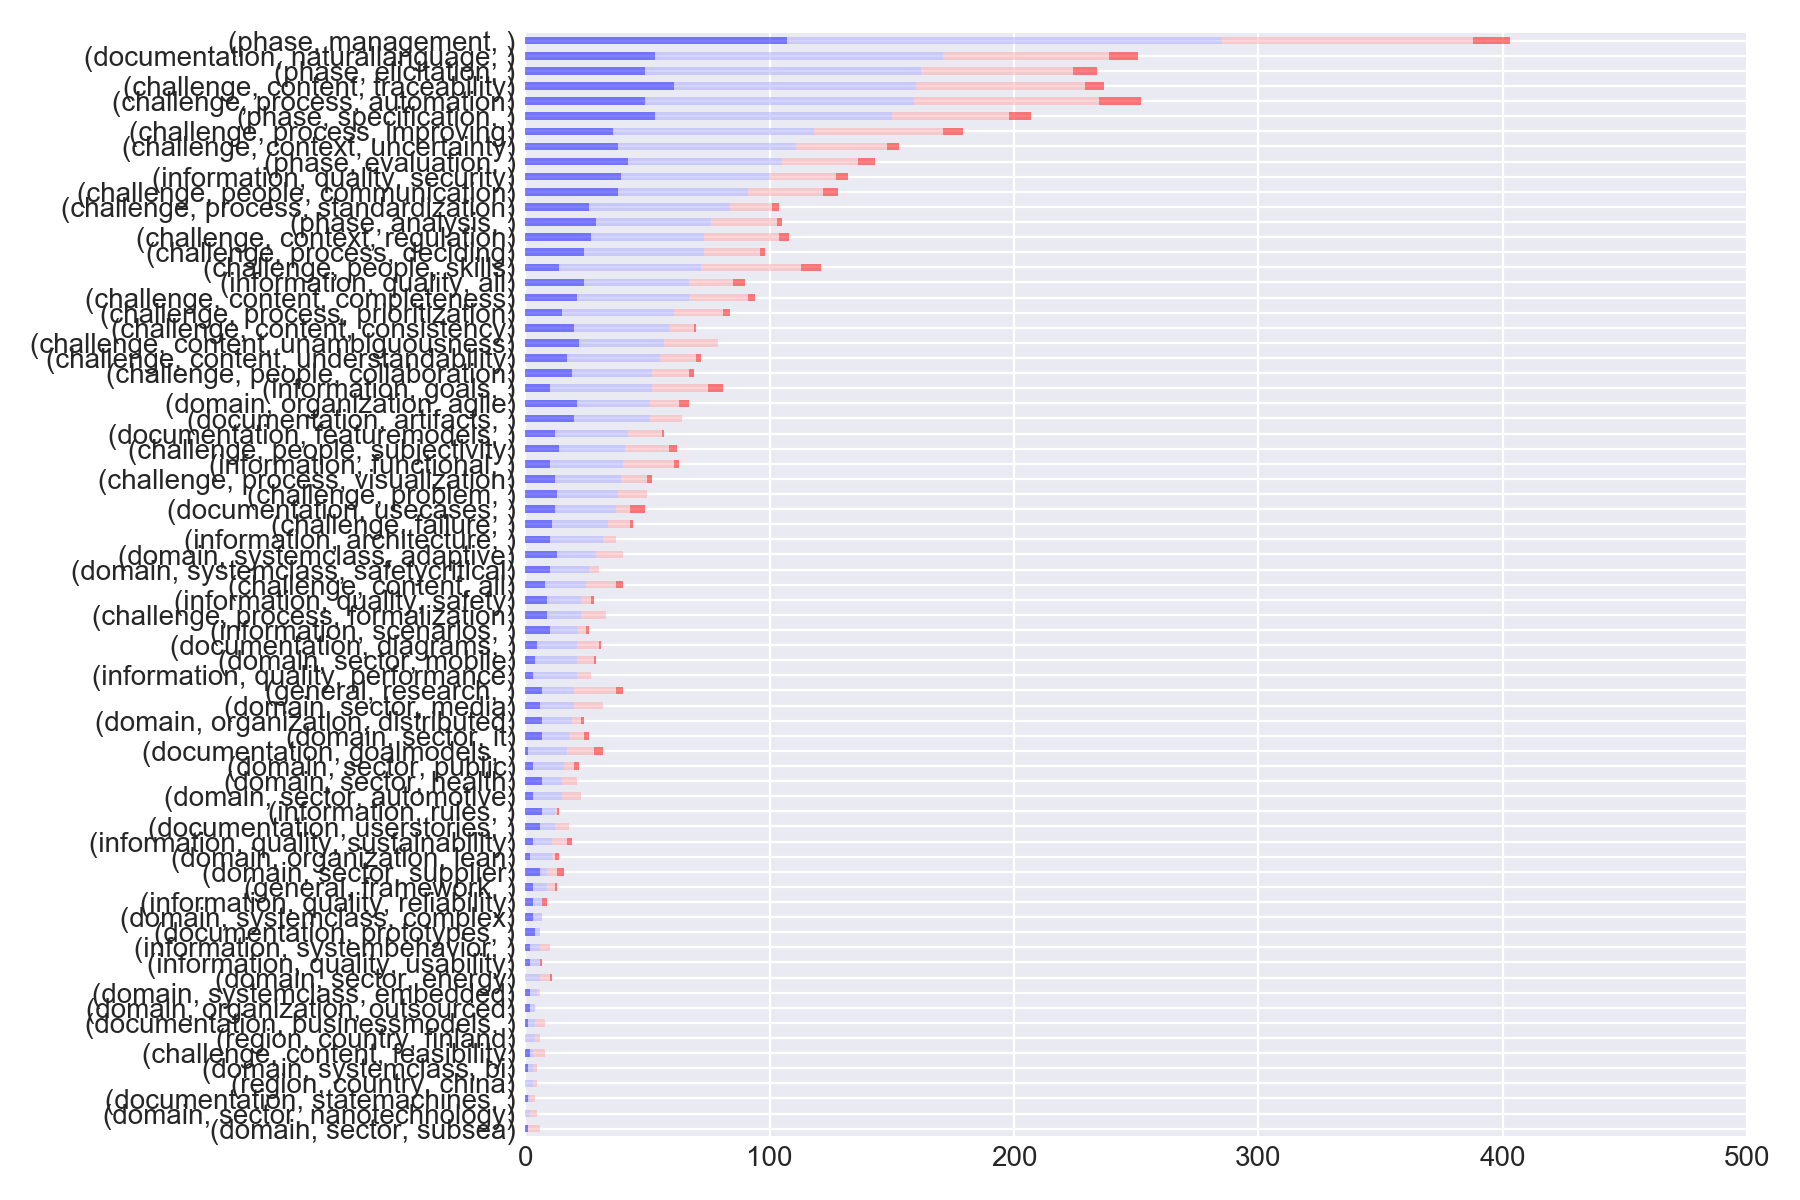

In [51]:
plot_tag_ratings(ratings_with_papertags(dfdict['truth_ratings'], 
                       papertags_content, all_levels, all_ratings, all_ratings_sorted, rel=False
                      ).loc['what'].sort_values([('pos'), ('count','0_Essential'), ('count','1_Worthwhile')], 
                                               na_position='first'), mode='abs')
save_plot('papertags_content_what_absolute')

<IPython.core.display.Javascript object>


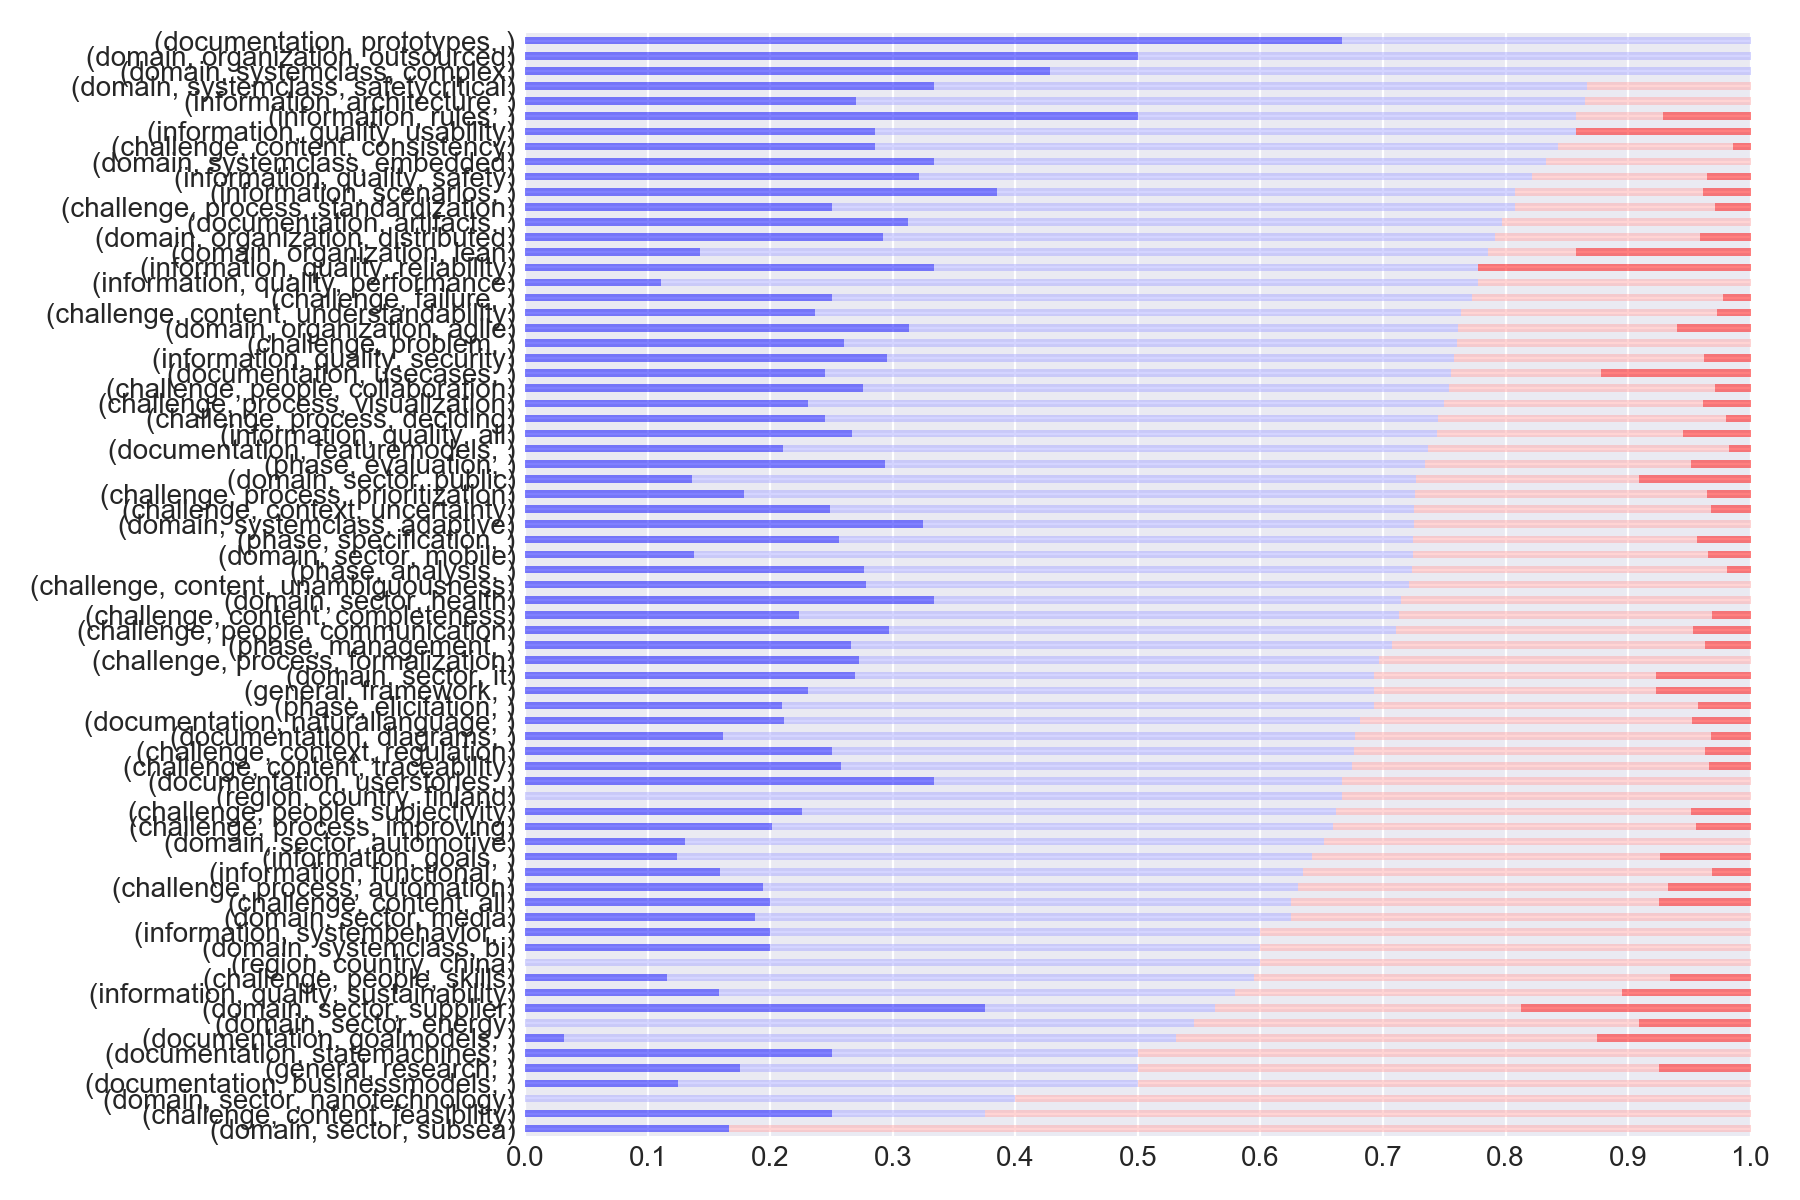

In [49]:
plot_tag_ratings(ratings_with_papertags(dfdict['truth_ratings'], 
                       papertags_content, all_levels, all_ratings, all_ratings_sorted, rel=True
                      ).loc['what'].sort_values([('pos'), ('count','0_Essential'), ('count','1_Worthwhile')], 
                                               na_position='first'), mode='rel')
save_plot('papertags_content_what_relative')